In [1]:
import os, sys
import h5py
sys.path.append(os.path.abspath("../../"))
from my_path import PPG2ABP_PATH


# Processed data

In [2]:


processed_data_file = "data.hdf5"


with h5py.File(f'{PPG2ABP_PATH}/data/{processed_data_file}', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['data']>


In [14]:
with h5py.File(f'{PPG2ABP_PATH}/data/{processed_data_file}', "r") as f:
    print(list(f.keys()))

['data']


In [6]:
len(data)

127260

In [7]:
data[0].shape

(2, 1250)

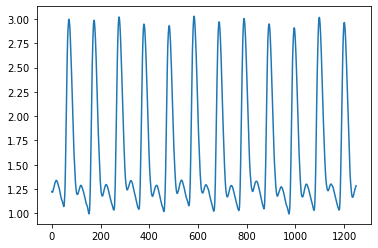

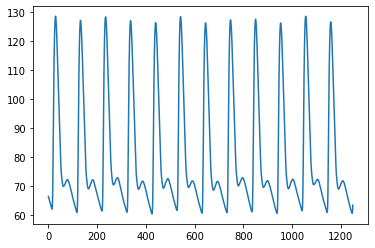

In [8]:
# plot data[0]
import matplotlib.pyplot as plt
plt.plot(data[0][1])
plt.show()
plt.plot(data[0][0])
plt.show()

0


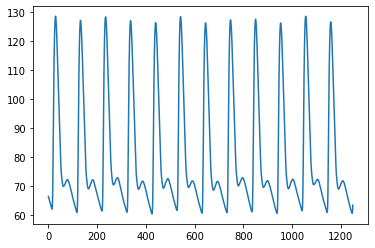

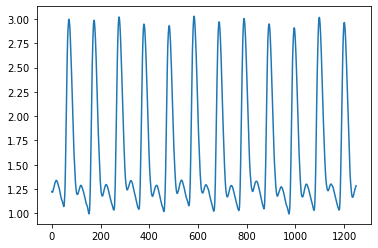

------------------
1


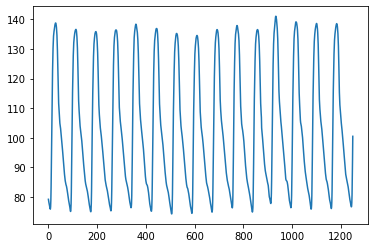

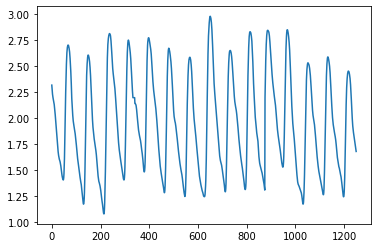

------------------
2


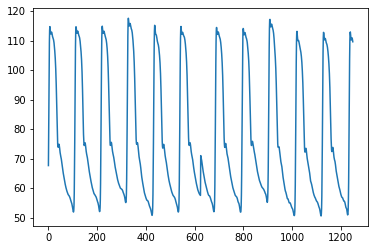

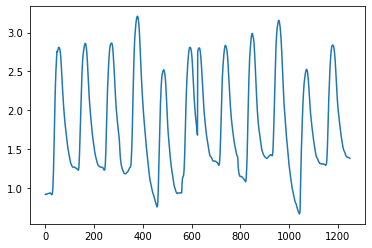

------------------
3


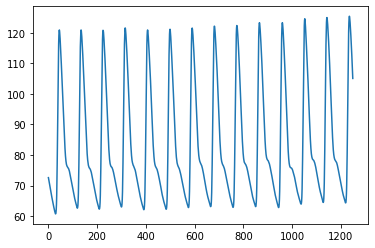

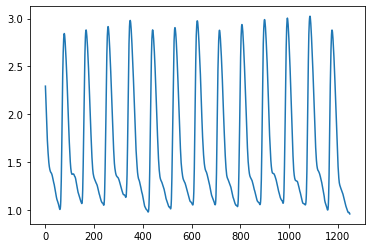

------------------
4


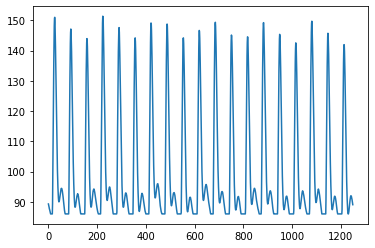

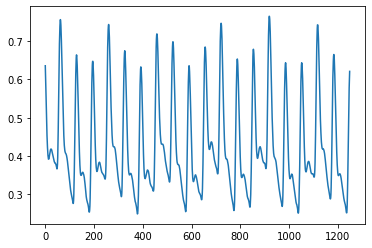

------------------
5


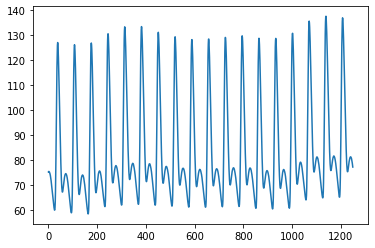

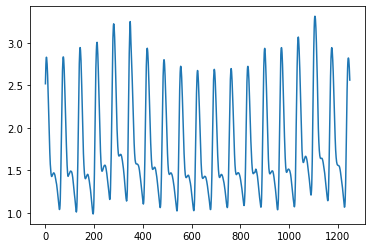

------------------
6


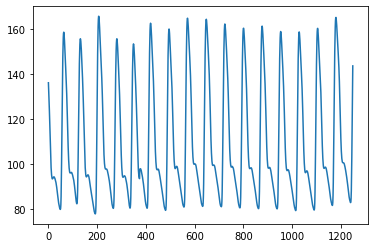

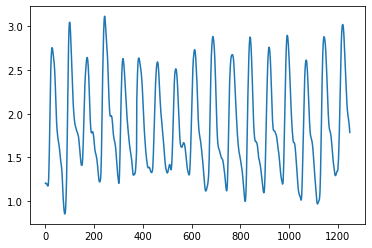

------------------
7


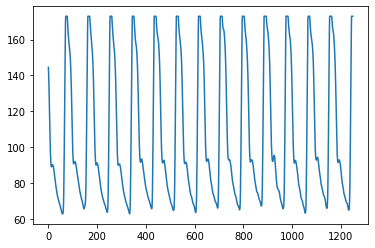

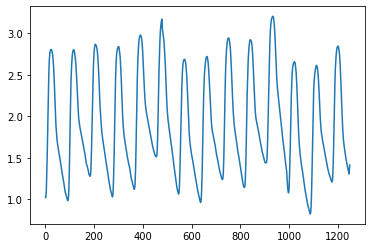

------------------
8


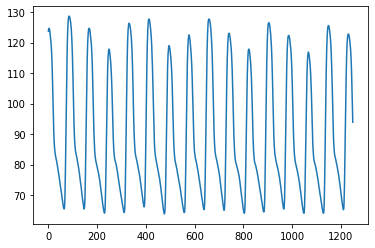

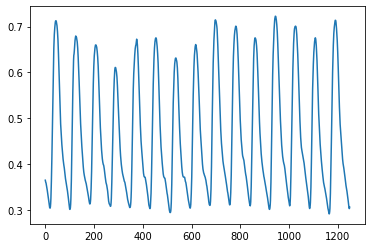

------------------
9


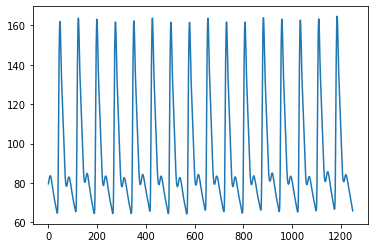

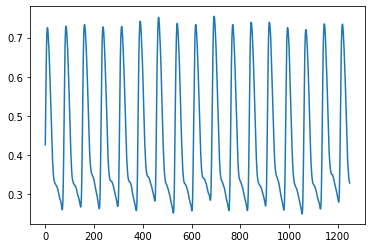

------------------


In [9]:
for i in range(10):
    print(i)
    plt.plot(data[i][0])
    plt.show()
    plt.plot(data[i][1])
    plt.show()
    print('------------------')

In [10]:
import numpy as np

def plot_fft(signal_data):
    specturm = np.fft.fft(signal_data)
    freq = np.fft.fftfreq(len(signal_data))

    plt.plot(freq, np.abs(specturm))
    plt.title("Frecuency Spectrum of Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    print(specturm, freq)

[100146.53188338  +0.j           -241.87660066 -44.82025837j
   -344.6713254  -96.96013626j ...   -353.80472019+103.59723639j
   -344.6713254  +96.96013626j   -241.87660066 +44.82025837j] [ 0.      0.0008  0.0016 ... -0.0024 -0.0016 -0.0008]


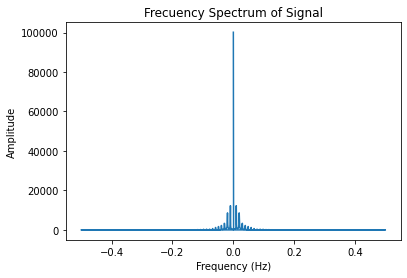

In [11]:
plot_fft(data[0][0])


[ 2.03081720e+03+0.j         -8.31792145e+00-2.22891033j
 -1.69231464e+00+0.26033405j ... -5.64659936e+00-5.53042099j
 -1.69231464e+00-0.26033405j -8.31792145e+00+2.22891033j] [ 0.      0.0008  0.0016 ... -0.0024 -0.0016 -0.0008]


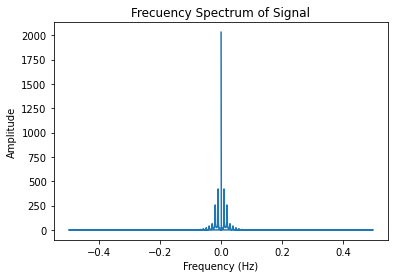

In [12]:
plot_fft(data[0][1])

# Preprocess data

In [8]:
from tqdm import tqdm
import h5py
import os, sys
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath("../../"))
from my_path import PPG2ABP_PATH

In [9]:
file_i = 1
ky = f'Part_{file_i}' # key
f = h5py.File(f'{PPG2ABP_PATH}/raw_data/Part_{file_i}.mat', 'r')
f.keys()

<KeysViewHDF5 ['#refs#', 'Part_1']>

In [10]:
len(f[ky])

3000

In [21]:
dict(f['#refs#'])

{'0': <HDF5 dataset "0": shape (1000, 3), type "<f8">,
 '0A': <HDF5 dataset "0A": shape (54000, 3), type "<f8">,
 '0B': <HDF5 dataset "0B": shape (13000, 3), type "<f8">,
 '0C': <HDF5 dataset "0C": shape (1000, 3), type "<f8">,
 '0D': <HDF5 dataset "0D": shape (19000, 3), type "<f8">,
 '0E': <HDF5 dataset "0E": shape (49000, 3), type "<f8">,
 '0F': <HDF5 dataset "0F": shape (6000, 3), type "<f8">,
 '0G': <HDF5 dataset "0G": shape (3000, 3), type "<f8">,
 '0H': <HDF5 dataset "0H": shape (36000, 3), type "<f8">,
 '0I': <HDF5 dataset "0I": shape (71000, 3), type "<f8">,
 '0J': <HDF5 dataset "0J": shape (18000, 3), type "<f8">,
 '0K': <HDF5 dataset "0K": shape (27000, 3), type "<f8">,
 '0L': <HDF5 dataset "0L": shape (2000, 3), type "<f8">,
 '0M': <HDF5 dataset "0M": shape (21000, 3), type "<f8">,
 '0N': <HDF5 dataset "0N": shape (1000, 3), type "<f8">,
 '0O': <HDF5 dataset "0O": shape (27000, 3), type "<f8">,
 '0P': <HDF5 dataset "0P": shape (7000, 3), type "<f8">,
 '0Q': <HDF5 dataset "0

In [11]:
#f[f[key][obj_in_key][0]]
f[f[ky][3][0]][2][:]

array([ 2.24242424, 75.17107648,  0.19990225])

In [12]:
#f[f[key][obj_in_key][0]]
f[f[ky][3][0]][0][:]

array([ 2.44281525, 76.09911446,  0.19990225])

In [13]:
#f[f[key][obj_in_key][0]]
f[f[ky][3][0]][1][:]

array([ 2.34506354, 75.65951752,  0.19990225])

In [14]:
f[f[ky][6][0]][0][:]

array([1.54838710e+00, 9.16315396e+01, 1.46627566e-02])

In [15]:

for i in tqdm(range(len(f[ky])),desc='Reading Records'):
    signal = []
    bp = []
    for j in range(2):
        signal.append(f[f[ky][i][0]][j][0])
        bp.append(f[f[ky][i][0]][j+2][0])


Reading Records: 100%|██████████| 3000/3000 [00:15<00:00, 196.79it/s]


In [16]:
signal

[0.5581622678396871, 0.5894428152492669]

In [5]:
import pickle
with open(f'{PPG2ABP_PATH}/data/meta9.p', 'rb') as f:
    data = pickle.load(f)


In [6]:
data

{'max_ppg': 4.001955034213099,
 'min_ppg': 0.0,
 'min_abp': 50.0,
 'max_abp': 199.9479008990615}

In [11]:

import h5py

def print_name(name):
    print(name)

try:
    with h5py.File(f'{PPG2ABP_PATH}/data/data.hdf5', 'r') as f:
        f.visit(print_name)
except Exception as e:
    print("An error occurred:", str(e))



data


In [6]:
import h5py
with h5py.File(f'{PPG2ABP_PATH}/data/data.hdf5', 'r') as f:
    data1 = f
    # Print all root level object names (aka keys) 
    # These can be group or dataset names 
    print(f"Keys: {f.keys()}]" )
    a_group_key = list(f.keys())[0]
    
    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key]))
    
    # if it is a dataset, you can directly access its content
    if isinstance(f[a_group_key], h5py.Dataset):
        datahdf5 = f[a_group_key][()]  # `()` is used to read all data at once
        print(datahdf5)



Keys: <KeysViewHDF5 ['data']>]
<class 'h5py._hl.dataset.Dataset'>
[[[ 66.31056163  65.99796028  65.68535892 ...  60.5665118   61.1917145
    63.30177362]
  [  1.22385142   1.21798631   1.21603128 ...   1.27272727   1.27956989
     1.28347996]]

 [[ 79.17629303  78.54131967  78.10172273 ...  85.81909121  92.6572658
   100.47232249]
  [  2.31476051   2.28152493   2.2512219  ...   1.71065494   1.69599218
     1.67839687]]

 [[ 67.69792852  78.44363146  90.41043701 ... 110.68074028 110.19229924
   109.60616999]
  [  0.91788856   0.91495601   0.91397849 ...   1.38709677   1.38416422
     1.38123167]]

 ...

 [[ 72.09389791  71.41008045  70.82395119 ...  71.60545686  71.31239224
    71.60545686]
  [  1.84652981   1.76050831   1.67546432 ...   1.68426197   1.6001955
     1.52199413]]

 [[ 68.6259665   67.79561673  67.30717569 ...  61.00628624  60.6155334
    60.32246878]
  [  1.79276637   1.98533724   2.18084066 ...   1.03323558   1.03030303
     1.03225806]]

 [[104.42869493 113.61138654 121

In [9]:
data1.keys()

ValueError: Invalid group (or file) id (invalid group (or file) ID)

In [16]:
import pickle
with open(f'{PPG2ABP_PATH}/data/test.p', 'rb') as f:
    test = pickle.load(f)

In [20]:
test

{'Y_test': array([[[0.31738037],
         [0.31249426],
         [0.30728241],
         ...,
         [0.43041232],
         [0.42064011],
         [0.41379956]],
 
        [[0.03919798],
         [0.02291096],
         [0.02225948],
         ...,
         [0.4124966 ],
         [0.40142142],
         [0.39230069]],
 
        [[0.25548968],
         [0.30500223],
         [0.36037812],
         ...,
         [0.42292029],
         [0.51184745],
         [0.59947164]],
 
        ...,
 
        [[0.14734383],
         [0.14278346],
         [0.13887458],
         ...,
         [0.16200215],
         [0.16493382],
         [0.1688427 ]],
 
        [[0.12421625],
         [0.11867867],
         [0.11542126],
         ...,
         [0.36558996],
         [0.37894533],
         [0.38708884]],
 
        [[0.36298404],
         [0.42422325],
         [0.4792734 ],
         ...,
         [0.69523935],
         [0.69100472],
         [0.68481565]]]),
 'X_test': array([[[0.67464582],
         [0.

: 

# Mark Data 

In [1]:
import os, sys
import h5py
sys.path.append(os.path.abspath("../../"))
from my_path import PPG2ABP_PATH, GTCARDIO_PATH
# reload my_path
from importlib import reload
reload(sys.modules['my_path'])
import pandas as pd

# get file list in GTCardio_PATH
#os.listdir(GTCARDIO_PATH)

In [2]:
# Read the file
gtc_data = pd.read_csv(f'../../{GTCARDIO_PATH}/001_Anterior_Wrist/MAX86177_20230828_211944.ppg.csv', header=32)
gtc_data


timestamp     sampleNum tagMEAS1_PPG1  \
0               1693250384283.777588  1.000000e+00           1_0   
1               1693250384291.555176  2.000000e+00           1_0   
2               1693250384299.332764  3.000000e+00           1_0   
3               1693250384307.110352  4.000000e+00           1_0   
4               1693250384314.888184  5.000000e+00           1_0   
...                              ...           ...           ...   
9638                       stop time  1.693250e+12           NaN   
9639  elapsed capture time: 0h01m16s           NaN           NaN   
9640          missed packet count: 0           NaN           NaN   
9641          incorrect tag count: 0           NaN           NaN   
9642            vcpp parser 20220803           NaN           NaN   

     tagMEAS1_PPG2 tagMEAS1_PPG3 tagMEAS1_PPG4  MEAS1_PPG1  MEAS1_PPG2  \
0              1_1           1_2           1_3      5230.0      2264.0   
1              1_1           1_2           1_3      5229.0      2262.0   
2              1_1           1_2           1_3      5227.0      2263.0   
3              1_1           1_2           1_3      5228.0      2262.0   
4              1_1           1_2           1_3      5227.0      2262.0   
...            ...           ...           ...         ...         ...   
9638           NaN           NaN           NaN         NaN         NaN   
9639           NaN           NaN           NaN         NaN         NaN   
9640           NaN           NaN           NaN         NaN         NaN   
9641           NaN           NaN           NaN         NaN         NaN   
9642           NaN           NaN           NaN         NaN         NaN   

      MEAS1_PPG3  MEAS1_PPG4   ACCX    ACCY   ACCZ  temperature  RTC  sensor  \
0          732.0      1950.0 -343.0  3756.0  900.0          NaN  NaN     NaN   
1          730.0      1950.0 -341.0  3772.0  910.0          NaN  NaN     NaN   
2          731.0      1946.0 -326.0  3770.0  926.0          NaN  NaN     NaN   
3          733.0      1949.0 -338.0  3785.0  914.0          NaN  NaN     NaN   
4          733.0      1949.0 -355.0  3769.0  922.0          NaN  NaN     NaN   
...          ...         ...    ...     ...    ...          ...  ...     ...   
9638         NaN         NaN    NaN     NaN    NaN          NaN  NaN     NaN   
9639         NaN         NaN    NaN     NaN    NaN          NaN  NaN     NaN   
9640         NaN         NaN    NaN     NaN    NaN          NaN  NaN     NaN   
9641         NaN         NaN    NaN     NaN    NaN          NaN  NaN     NaN   
9642         NaN         NaN    NaN     NaN    NaN          NaN  NaN     NaN   

      regAddr  val  I2Caddr  Unnamed: 19  
0         NaN  NaN      NaN          NaN  
1         NaN  NaN      NaN          NaN  
2         NaN  NaN      NaN          NaN  
3         NaN  NaN      NaN          NaN  
4         NaN  NaN      NaN          NaN  
...       ...  ...      ...          ...  
9638      NaN  NaN      NaN          NaN  
9639      NaN  NaN      NaN          NaN  
9640      NaN  NaN      NaN          NaN  
9641      NaN  NaN      NaN          NaN  
9642      NaN  NaN      NaN          NaN  

[9643 rows x 20 columns]

In [3]:
def clean_timestamp(df, timestamp_column='timestamp'):
    # if timestamp is not numeric, convert it to numeric, if its not possible, drop the row
    df[timestamp_column] = pd.to_numeric(df[timestamp_column], errors='coerce')
    # convert timestamp column to int
    df[timestamp_column] = df[timestamp_column].astype(float)
    # convert timestamp column to datetime
    #df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    # drop rows with null values in timestamp column
    df = df.dropna(subset=[timestamp_column])
    return df

gtc_data = clean_timestamp(gtc_data)
gtc_data

timestamp  sampleNum tagMEAS1_PPG1 tagMEAS1_PPG2 tagMEAS1_PPG3  \
0     1.693250e+12        1.0           1_0           1_1           1_2   
1     1.693250e+12        2.0           1_0           1_1           1_2   
2     1.693250e+12        3.0           1_0           1_1           1_2   
3     1.693250e+12        4.0           1_0           1_1           1_2   
4     1.693250e+12        5.0           1_0           1_1           1_2   
...            ...        ...           ...           ...           ...   
9633  1.693250e+12     9634.0           1_0           1_1           1_2   
9634  1.693250e+12     9635.0           1_0           1_1           1_2   
9635  1.693250e+12     9636.0           1_0           1_1           1_2   
9636  1.693250e+12     9637.0           1_0           1_1           1_2   
9637  1.693250e+12     9638.0           1_0           1_1           1_2   

     tagMEAS1_PPG4  MEAS1_PPG1  MEAS1_PPG2  MEAS1_PPG3  MEAS1_PPG4   ACCX  \
0              1_3      5230.0      2264.0       732.0      1950.0 -343.0   
1              1_3      5229.0      2262.0       730.0      1950.0 -341.0   
2              1_3      5227.0      2263.0       731.0      1946.0 -326.0   
3              1_3      5228.0      2262.0       733.0      1949.0 -338.0   
4              1_3      5227.0      2262.0       733.0      1949.0 -355.0   
...            ...         ...         ...         ...         ...    ...   
9633           1_3      4851.0      2132.0       680.0      1848.0 -363.0   
9634           1_3      4849.0      2133.0       682.0      1847.0 -351.0   
9635           1_3      4853.0      2136.0       682.0      1848.0 -359.0   
9636           1_3      4853.0      2133.0       680.0      1847.0 -364.0   
9637           1_3      4854.0      2134.0       682.0      1847.0 -361.0   

        ACCY    ACCZ  temperature      RTC  sensor  regAddr  val  I2Caddr  \
0     3756.0   900.0          NaN      NaN     NaN      NaN  NaN      NaN   
1     3772.0   910.0          NaN      NaN     NaN      NaN  NaN      NaN   
2     3770.0   926.0          NaN      NaN     NaN      NaN  NaN      NaN   
3     3785.0   914.0          NaN      NaN     NaN      NaN  NaN      NaN   
4     3769.0   922.0          NaN      NaN     NaN      NaN  NaN      NaN   
...      ...     ...          ...      ...     ...      ...  ...      ...   
9633  3668.0  1113.0          NaN      NaN     NaN      NaN  NaN      NaN   
9634  3688.0  1130.0          NaN      NaN     NaN      NaN  NaN      NaN   
9635  3671.0  1132.0          NaN      NaN     NaN      NaN  NaN      NaN   
9636  3678.0  1126.0          NaN      NaN     NaN      NaN  NaN      NaN   
9637  3683.0  1105.0          0.0  77857.0     NaN      NaN  NaN      NaN   

      Unnamed: 19  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
9633          NaN  
9634          NaN  
9635          NaN  
9636          NaN  
9637          NaN  

[9638 rows x 20 columns]

In [4]:
# check is all the values in the timestamp column are integers
print(f"All timestamps are float: {gtc_data['timestamp'].apply(lambda x: isinstance(x, float)).all()}")
# count nan for each column
for col in gtc_data.columns:
    print(col, gtc_data[col].isnull().sum())

All timestamps are float: True
timestamp 0
sampleNum 0
tagMEAS1_PPG1 0
tagMEAS1_PPG2 0
tagMEAS1_PPG3 0
tagMEAS1_PPG4 0
MEAS1_PPG1 0
MEAS1_PPG2 0
MEAS1_PPG3 0
MEAS1_PPG4 0
ACCX 0
ACCY 0
ACCZ 0
temperature 9563
RTC 9563
sensor 9638
regAddr 9638
val 9638
I2Caddr 9638
Unnamed: 19 9638


In [5]:
gtc_data.describe()

timestamp    sampleNum   MEAS1_PPG1   MEAS1_PPG2   MEAS1_PPG3  \
count  9.638000e+03  9638.000000  9638.000000  9638.000000  9638.000000   
mean   1.693250e+12  4819.500000  5011.101888  2188.056443   685.473646   
std    2.164040e+04  2782.395281   127.501219    64.524537    23.179067   
min    1.693250e+12     1.000000  4772.000000  2046.000000   627.000000   
25%    1.693250e+12  2410.250000  4902.000000  2130.000000   674.000000   
50%    1.693250e+12  4819.500000  5012.000000  2198.000000   687.000000   
75%    1.693250e+12  7228.750000  5121.000000  2239.000000   702.000000   
max    1.693250e+12  9638.000000  5261.000000  2305.000000   733.000000   

        MEAS1_PPG4         ACCX         ACCY         ACCZ  temperature  \
count  9638.000000  9638.000000  9638.000000  9638.000000         75.0   
mean   1862.759909  -348.950612  3706.958913  1020.460054          0.0   
std      37.223120    15.952217    31.931209    76.569509          0.0   
min    1787.000000  -428.000000  3629.000000   860.000000          0.0   
25%    1837.000000  -359.000000  3682.000000   953.000000          0.0   
50%    1860.000000  -348.000000  3705.000000  1014.000000          0.0   
75%    1893.000000  -338.000000  3730.000000  1090.000000          0.0   
max    1951.000000  -301.000000  3821.000000  1191.000000          0.0   

                RTC  sensor  regAddr  val  I2Caddr  Unnamed: 19  
count     75.000000     0.0      0.0  0.0      0.0          0.0  
mean   39954.746667     NaN      NaN  NaN      NaN          NaN  
std    22325.026160     NaN      NaN  NaN      NaN          NaN  
min     2053.000000     NaN      NaN  NaN      NaN          NaN  
25%    21004.500000     NaN      NaN  NaN      NaN          NaN  
50%    39955.000000     NaN      NaN  NaN      NaN          NaN  
75%    58906.500000     NaN      NaN  NaN      NaN          NaN  
max    77857.000000     NaN      NaN  NaN      NaN          NaN

/tmp/ipykernel_17033/4239929773.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtc_data['MEAS1_PPG1_normalized'] = (gtc_data['MEAS1_PPG1'] - min_value) / (max_value - min_value)


Text(0.5, 0, 'Time')

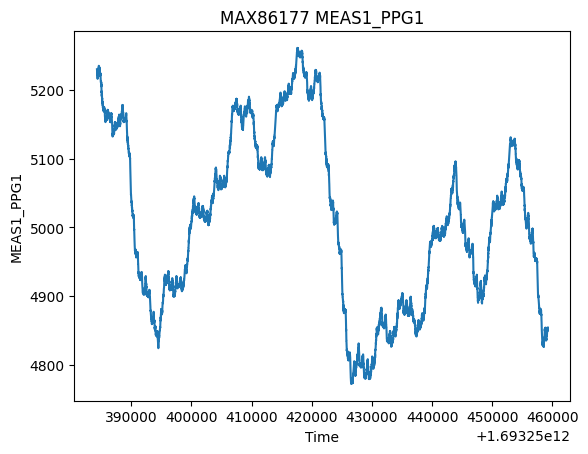

In [6]:
import matplotlib.pyplot as plt

# Calculate the minimum and maximum values of the column
min_value = gtc_data['MEAS1_PPG1'].min()
max_value = gtc_data['MEAS1_PPG1'].max()

# Apply normalization formula to the column
gtc_data['MEAS1_PPG1_normalized'] = (gtc_data['MEAS1_PPG1'] - min_value) / (max_value - min_value)

# Plot the normalized column
plt.plot(gtc_data['timestamp'], gtc_data['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Time')


In [7]:
gtc_model_input = gtc_data[['MEAS1_PPG1_normalized']]
gtc_model_input

MEAS1_PPG1_normalized
0                  0.936605
1                  0.934560
2                  0.930470
3                  0.932515
4                  0.930470
...                     ...
9633               0.161554
9634               0.157464
9635               0.165644
9636               0.165644
9637               0.167689

[9638 rows x 1 columns]

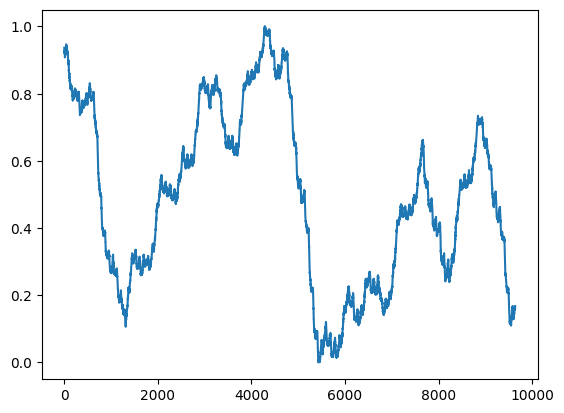

In [8]:
# plot the data
plt.plot(gtc_model_input)

In [9]:
# move to PPG2ABP directory
os.chdir(PPG2ABP_PATH)

In [10]:
# milliseconds
import pickle
dt = pickle.load(open(os.path.join('data','test.p'),'rb'))      # loading test data
X_test = dt['X_test']
Y_test = dt['Y_test']   

In [11]:
dt

{'Y_test': array([[[0.31738037],
         [0.31249426],
         [0.30728241],
         ...,
         [0.43041232],
         [0.42064011],
         [0.41379956]],
 
        [[0.03919798],
         [0.02291096],
         [0.02225948],
         ...,
         [0.4124966 ],
         [0.40142142],
         [0.39230069]],
 
        [[0.25548968],
         [0.30500223],
         [0.36037812],
         ...,
         [0.42292029],
         [0.51184745],
         [0.59947164]],
 
        ...,
 
        [[0.14734383],
         [0.14278346],
         [0.13887458],
         ...,
         [0.16200215],
         [0.16493382],
         [0.1688427 ]],
 
        [[0.12421625],
         [0.11867867],
         [0.11542126],
         ...,
         [0.36558996],
         [0.37894533],
         [0.38708884]],
 
        [[0.36298404],
         [0.42422325],
         [0.4792734 ],
         ...,
         [0.69523935],
         [0.69100472],
         [0.68481565]]]),
 'X_test': array([[[0.67464582],
         [0.

In [12]:
X_test.shape

(27260, 1024, 1)

In [13]:
X_test[0].shape

(1024, 1)

In [14]:
gtc_model_input = gtc_model_input.MEAS1_PPG1_normalized.values
gtc_model_input

array([0.93660532, 0.93456033, 0.93047035, ..., 0.16564417, 0.16564417,
       0.16768916])

In [15]:
len(gtc_model_input)

9638

In [16]:
import numpy as np

def reshape_array(arr, new_shape):
    # Calculate the total number of elements for the new shape
    total_elements = np.prod(new_shape)
    
    # Trim the array if necessary
    if arr.size > total_elements:
        arr = arr[:total_elements]
    
    # Reshape the array
    reshaped_array = arr.reshape(new_shape)
    
    return reshaped_array

new_shape = (gtc_model_input.size // 1024, 1024, 1)
reshaped_array = reshape_array(gtc_model_input, new_shape)

In [17]:
reshaped_array.shape

(9, 1024, 1)

In [18]:
from models import UNetDS64, MultiResUNet1D
length = 1024               # length of signal

mdl1 = UNetDS64(length)                                             # creating approximation network
mdl1.load_weights(os.path.join('models','ApproximateNetwork.h5'))   # loading weights
mdl2 = MultiResUNet1D(length)                                       # creating refinement network
mdl2.load_weights(os.path.join('models','RefinementNetwork.h5'))


2023-10-30 09:23:52.419397: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 09:23:52.464929: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 09:23:52.466191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 09:23:53.305052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-30 09:23:54.301327: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-30 09:23:54.330222: W tensorflow/core/common_r

In [19]:
from pprint import pprint
pprint(X_test)

array([[[0.67464582],
        [0.65974597],
        [0.6455789 ],
        ...,
        [0.4159746 ],
        [0.40962384],
        [0.40278456]],

       [[0.74645823],
        [0.73302394],
        [0.71763556],
        ...,
        [0.33439179],
        [0.33170493],
        [0.32975085]],

       [[0.42940889],
        [0.42672203],
        [0.42403517],
        ...,
        [0.44113337],
        [0.43917929],
        [0.43624817]],

       ...,

       [[0.46140694],
        [0.43991207],
        [0.41866146],
        ...,
        [0.42525647],
        [0.47581827],
        [0.52808989]],

       [[0.44797264],
        [0.49609184],
        [0.54494382],
        ...,
        [0.31045432],
        [0.30727894],
        [0.30459209]],

       [[0.32755252],
        [0.32657548],
        [0.32559844],
        ...,
        [0.28724963],
        [0.28895945],
        [0.28993649]]])


In [20]:

Y_test_pred_approximate = mdl1.predict(reshaped_array,verbose=1)            # predicting approximate abp waveform
Y_test_pred = mdl2.predict(Y_test_pred_approximate[0],verbose=1)

1/1 [==============================] - 1s 1s/step


In [21]:
pickle.dump(Y_test_pred_approximate,open('mark_data_output_approximate.p','wb')) # saving the approxmiate predictions
pickle.dump(Y_test_pred,open('test_output.p','wb')) 

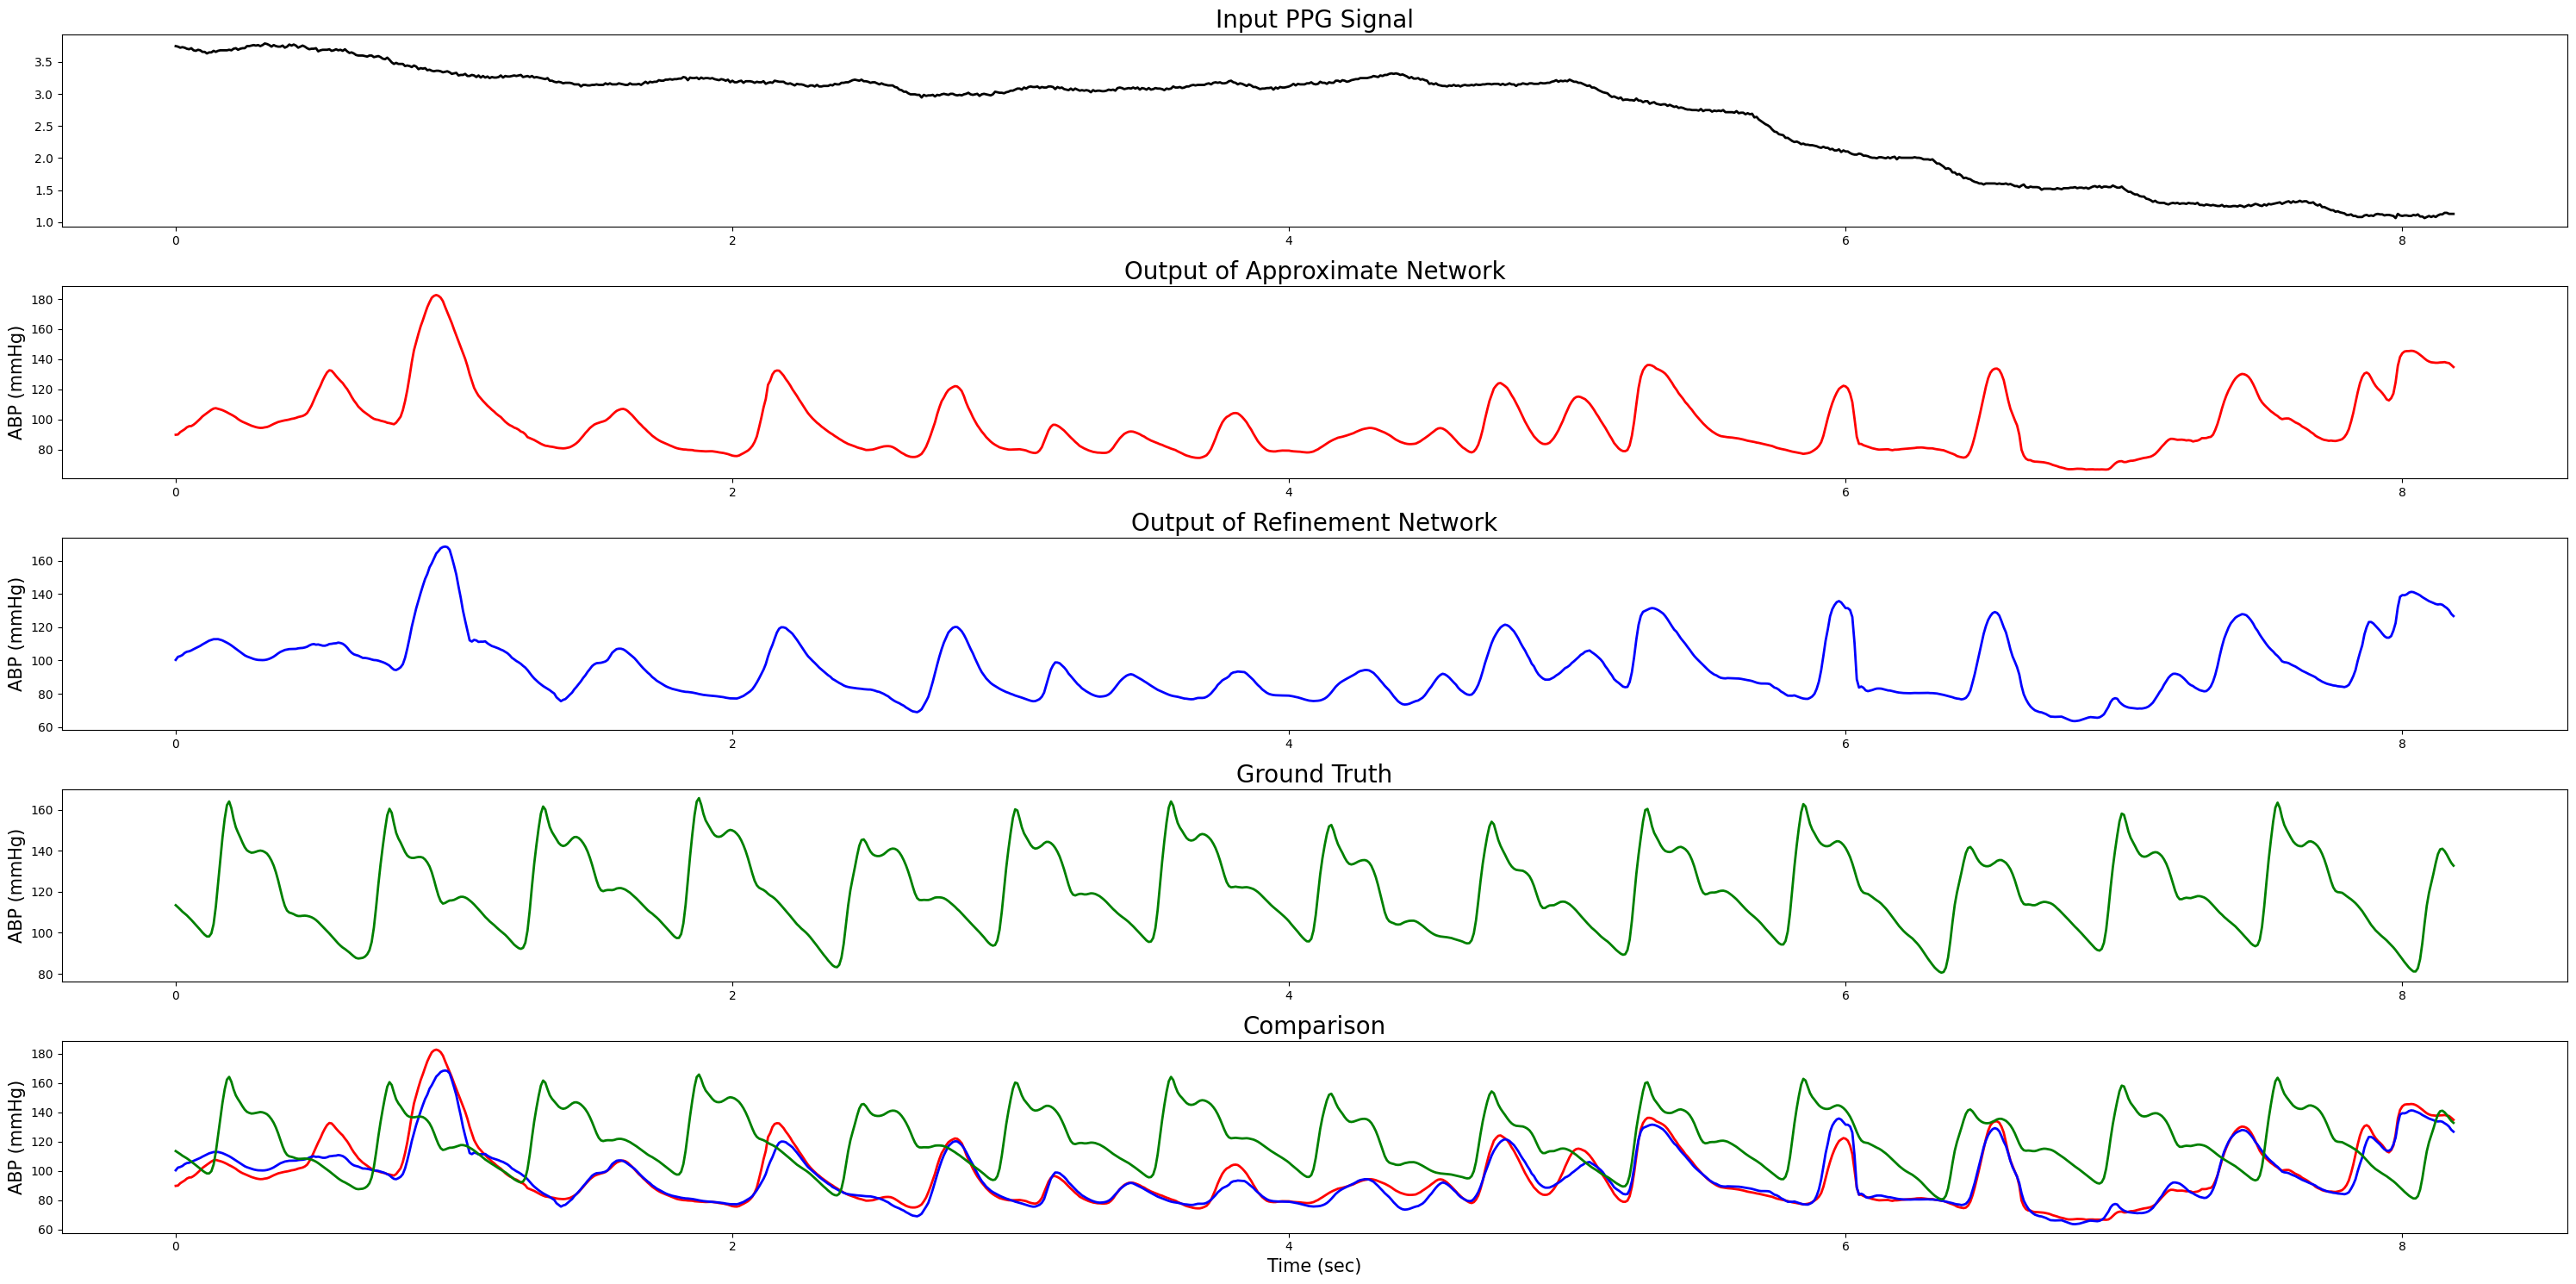

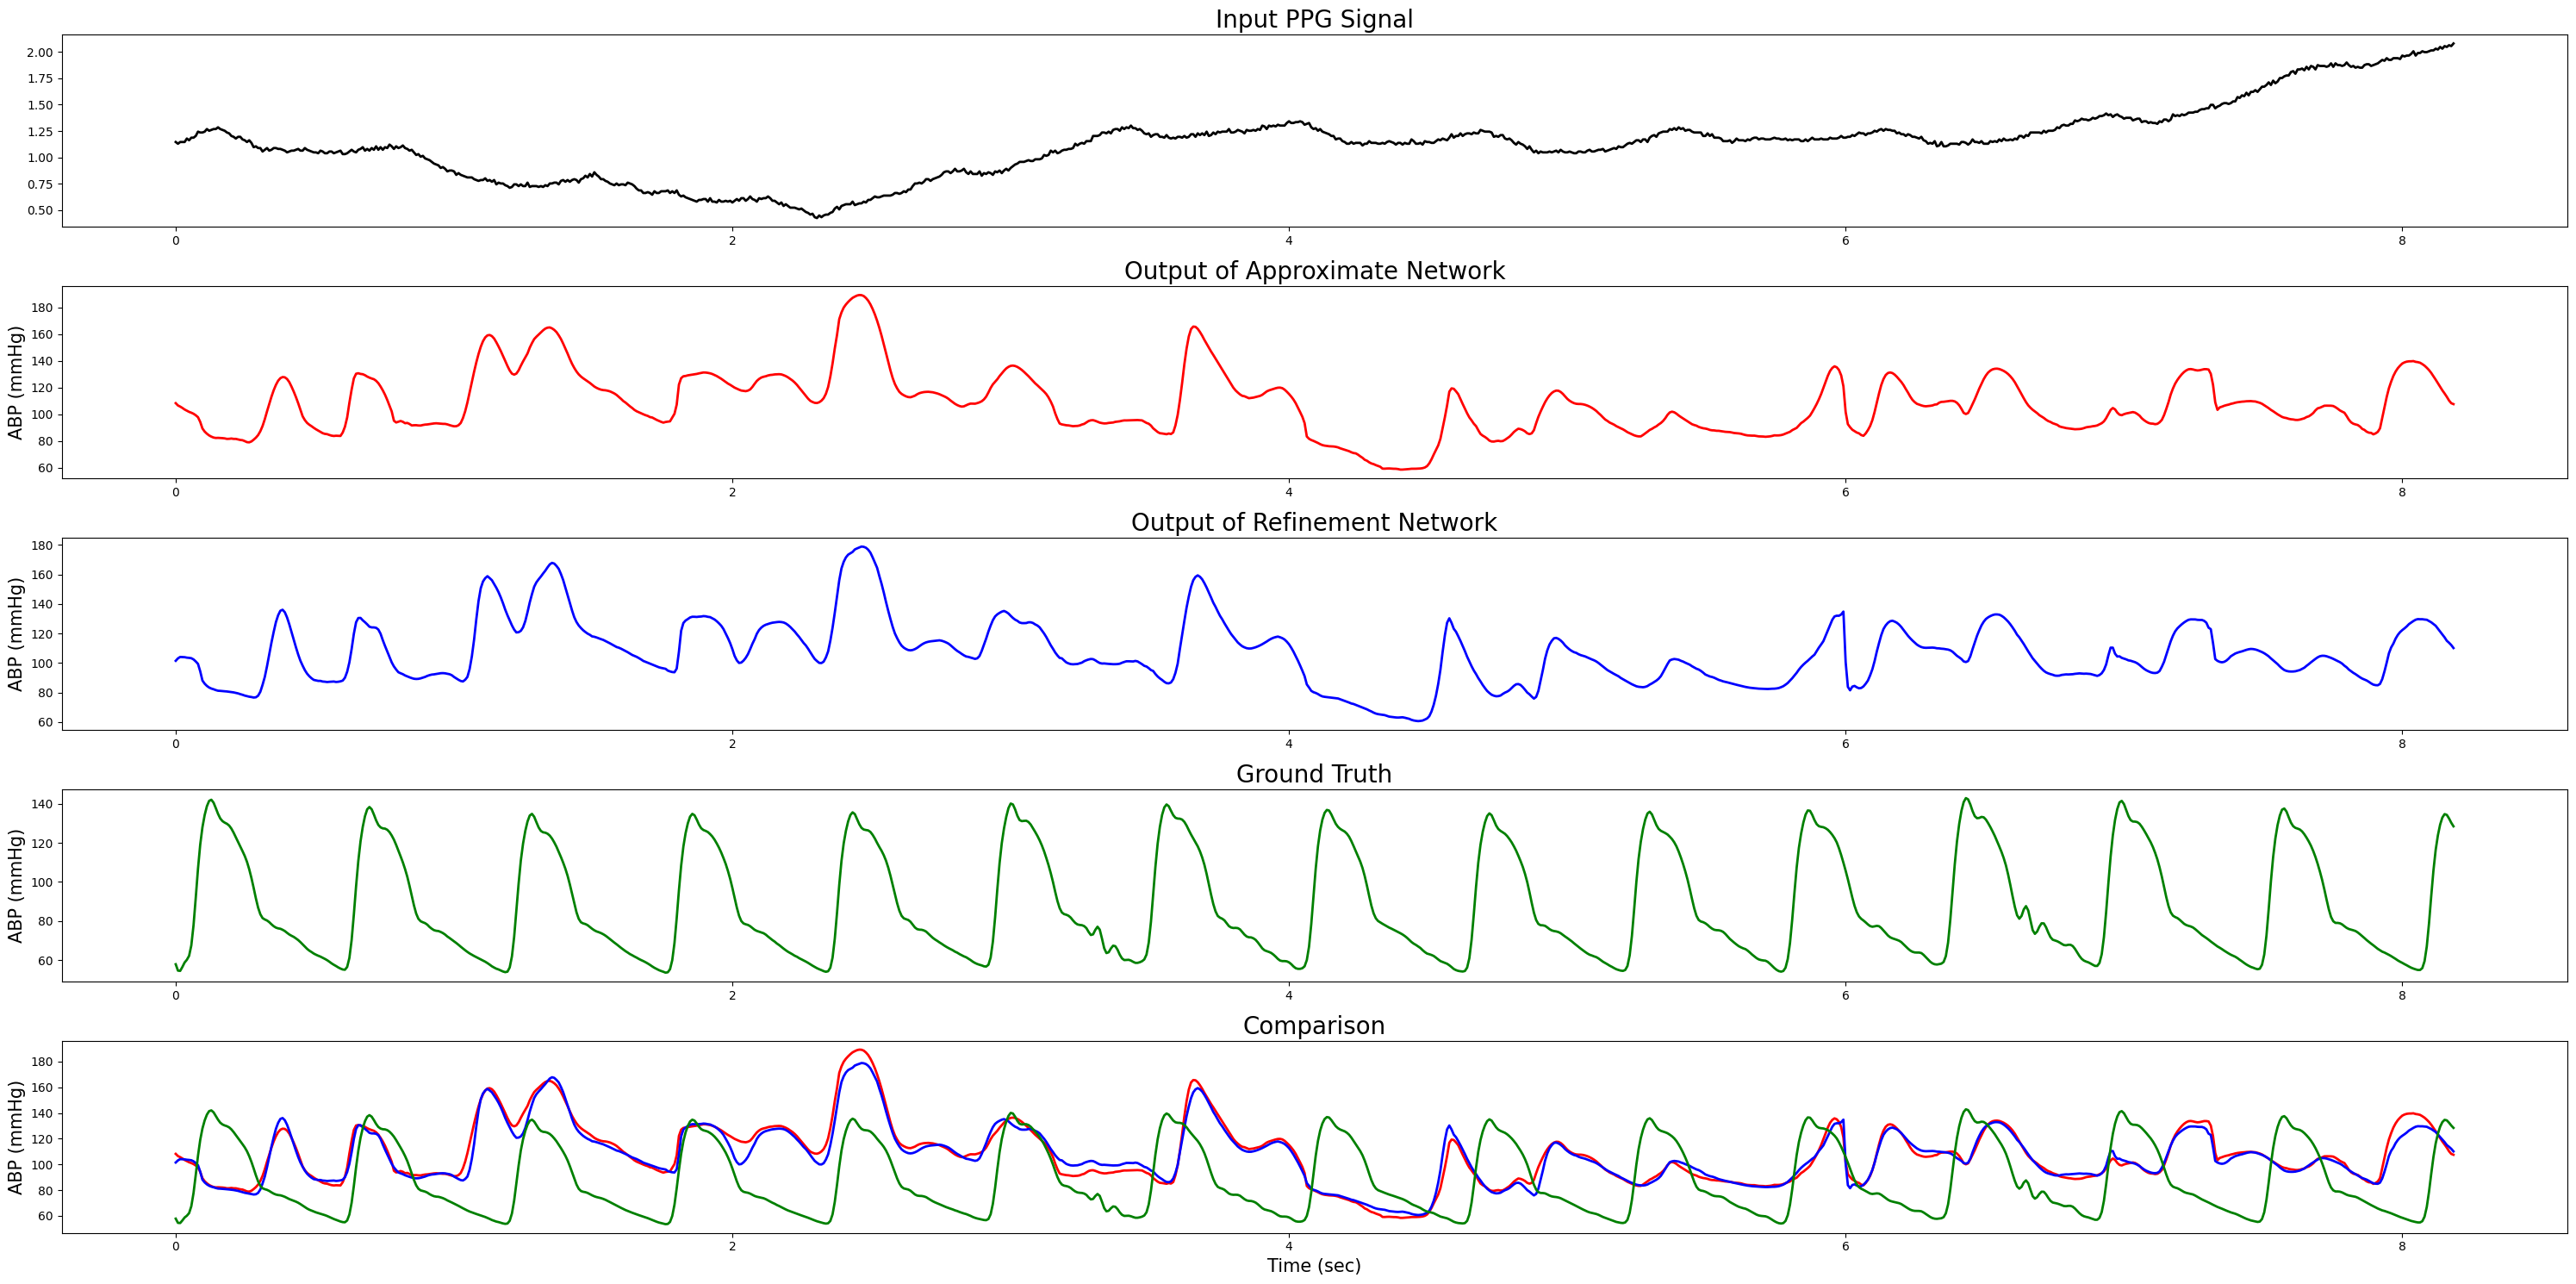

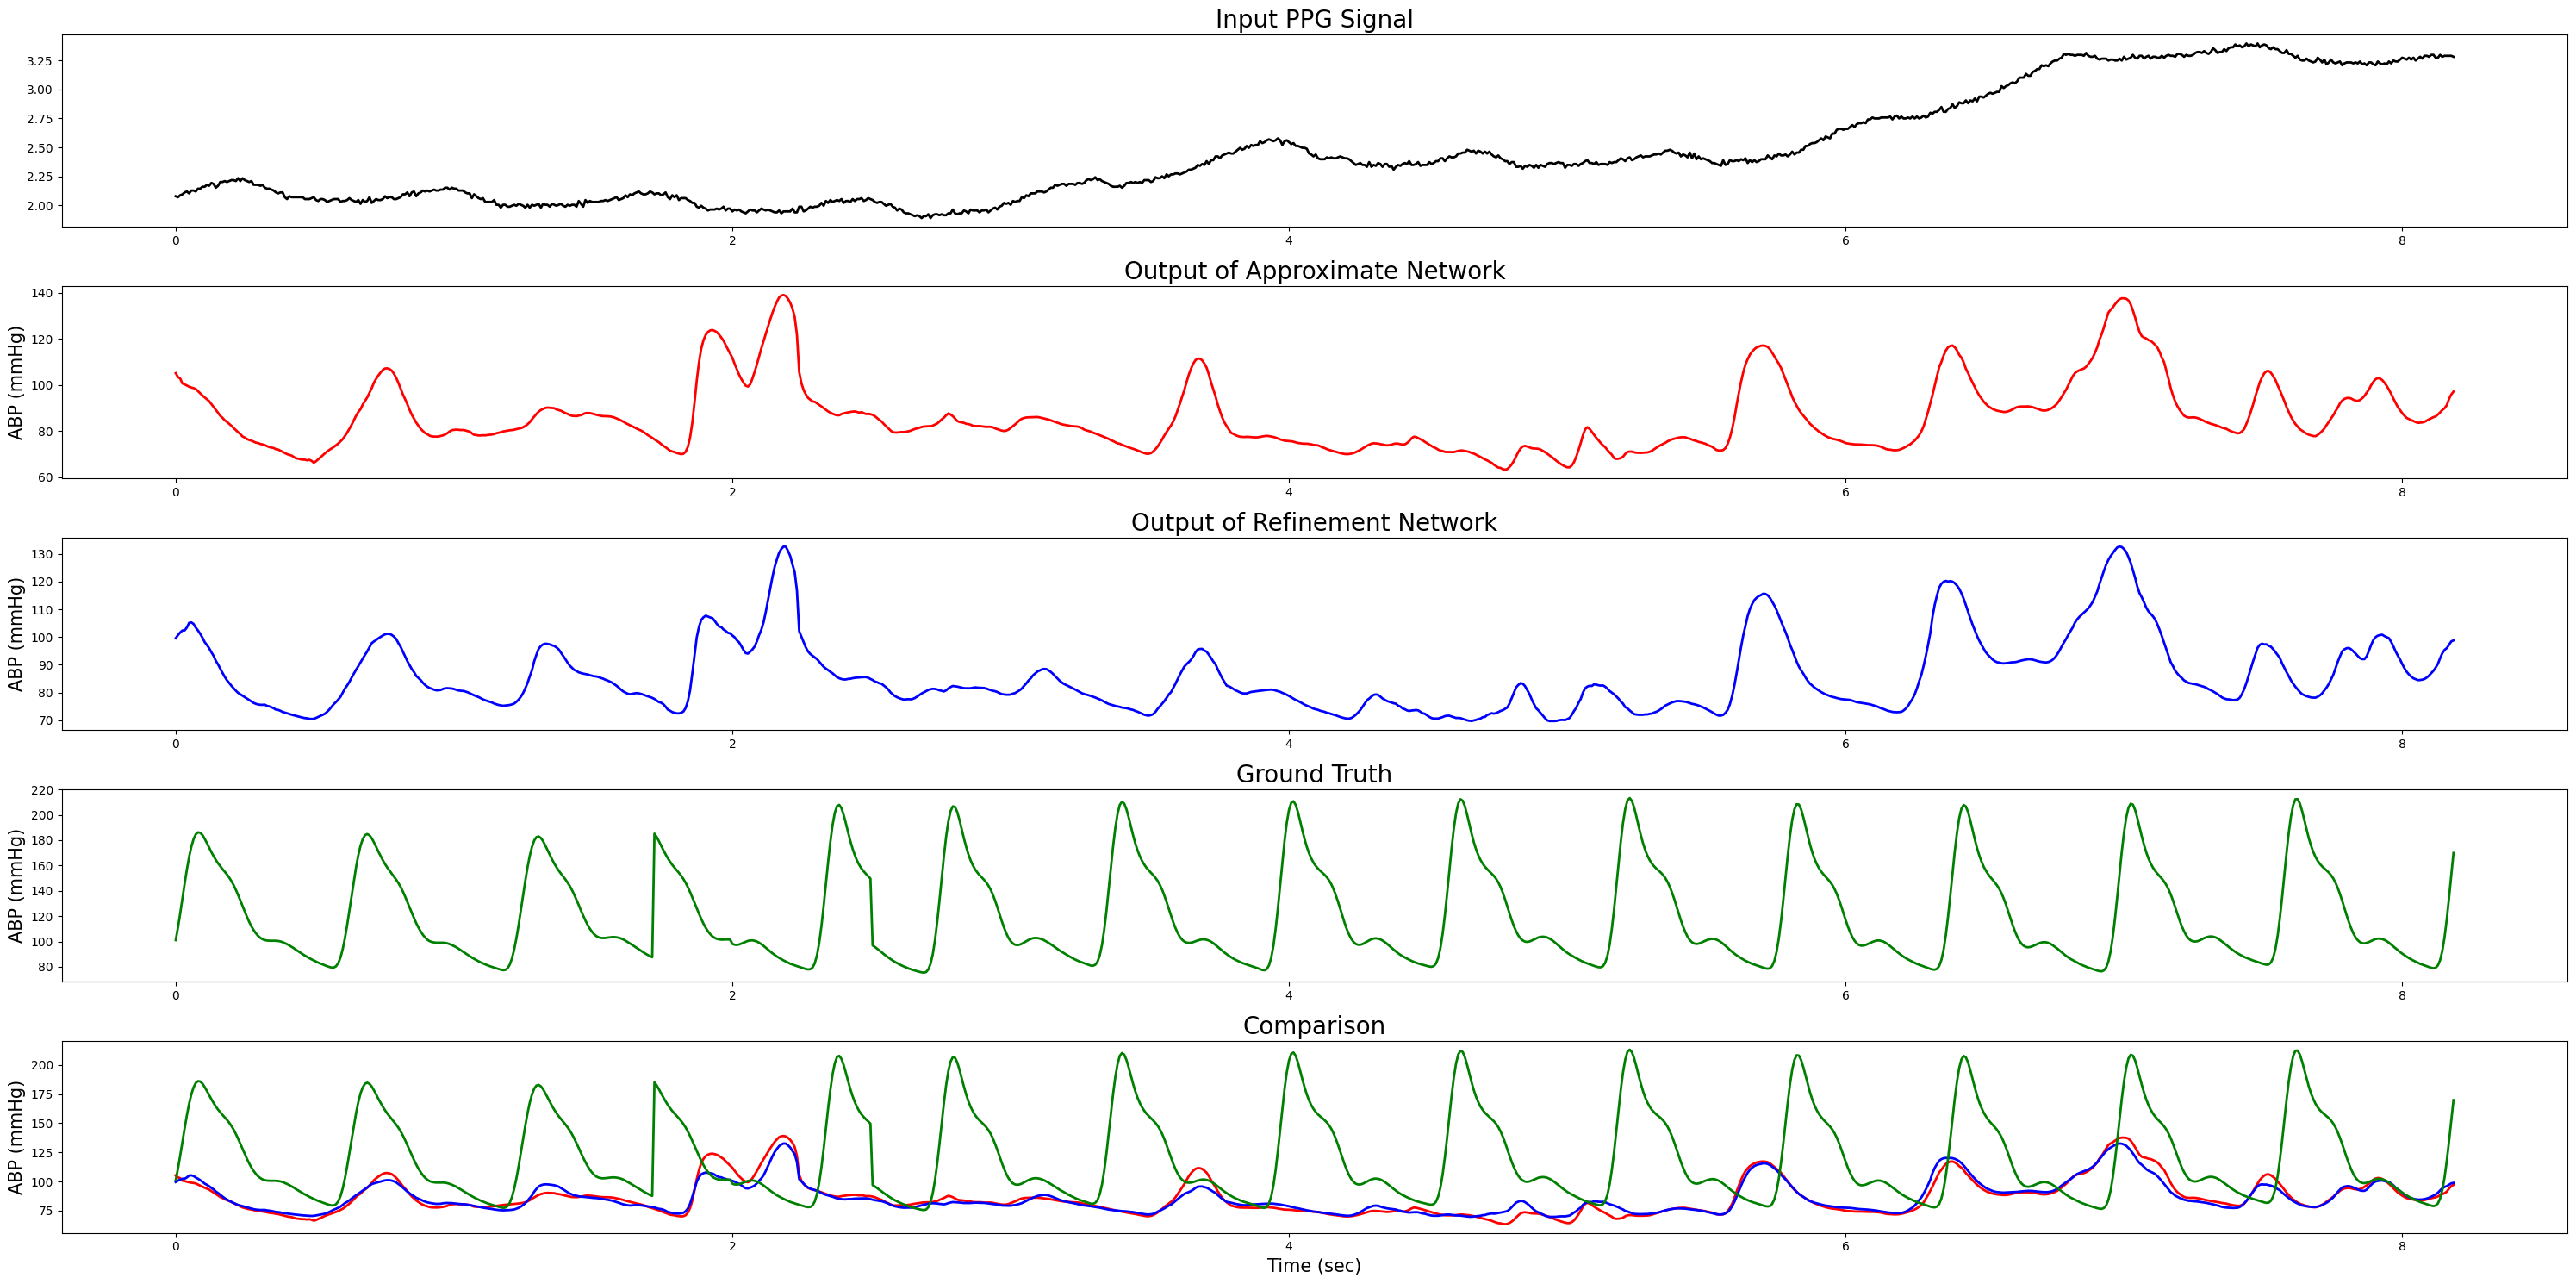

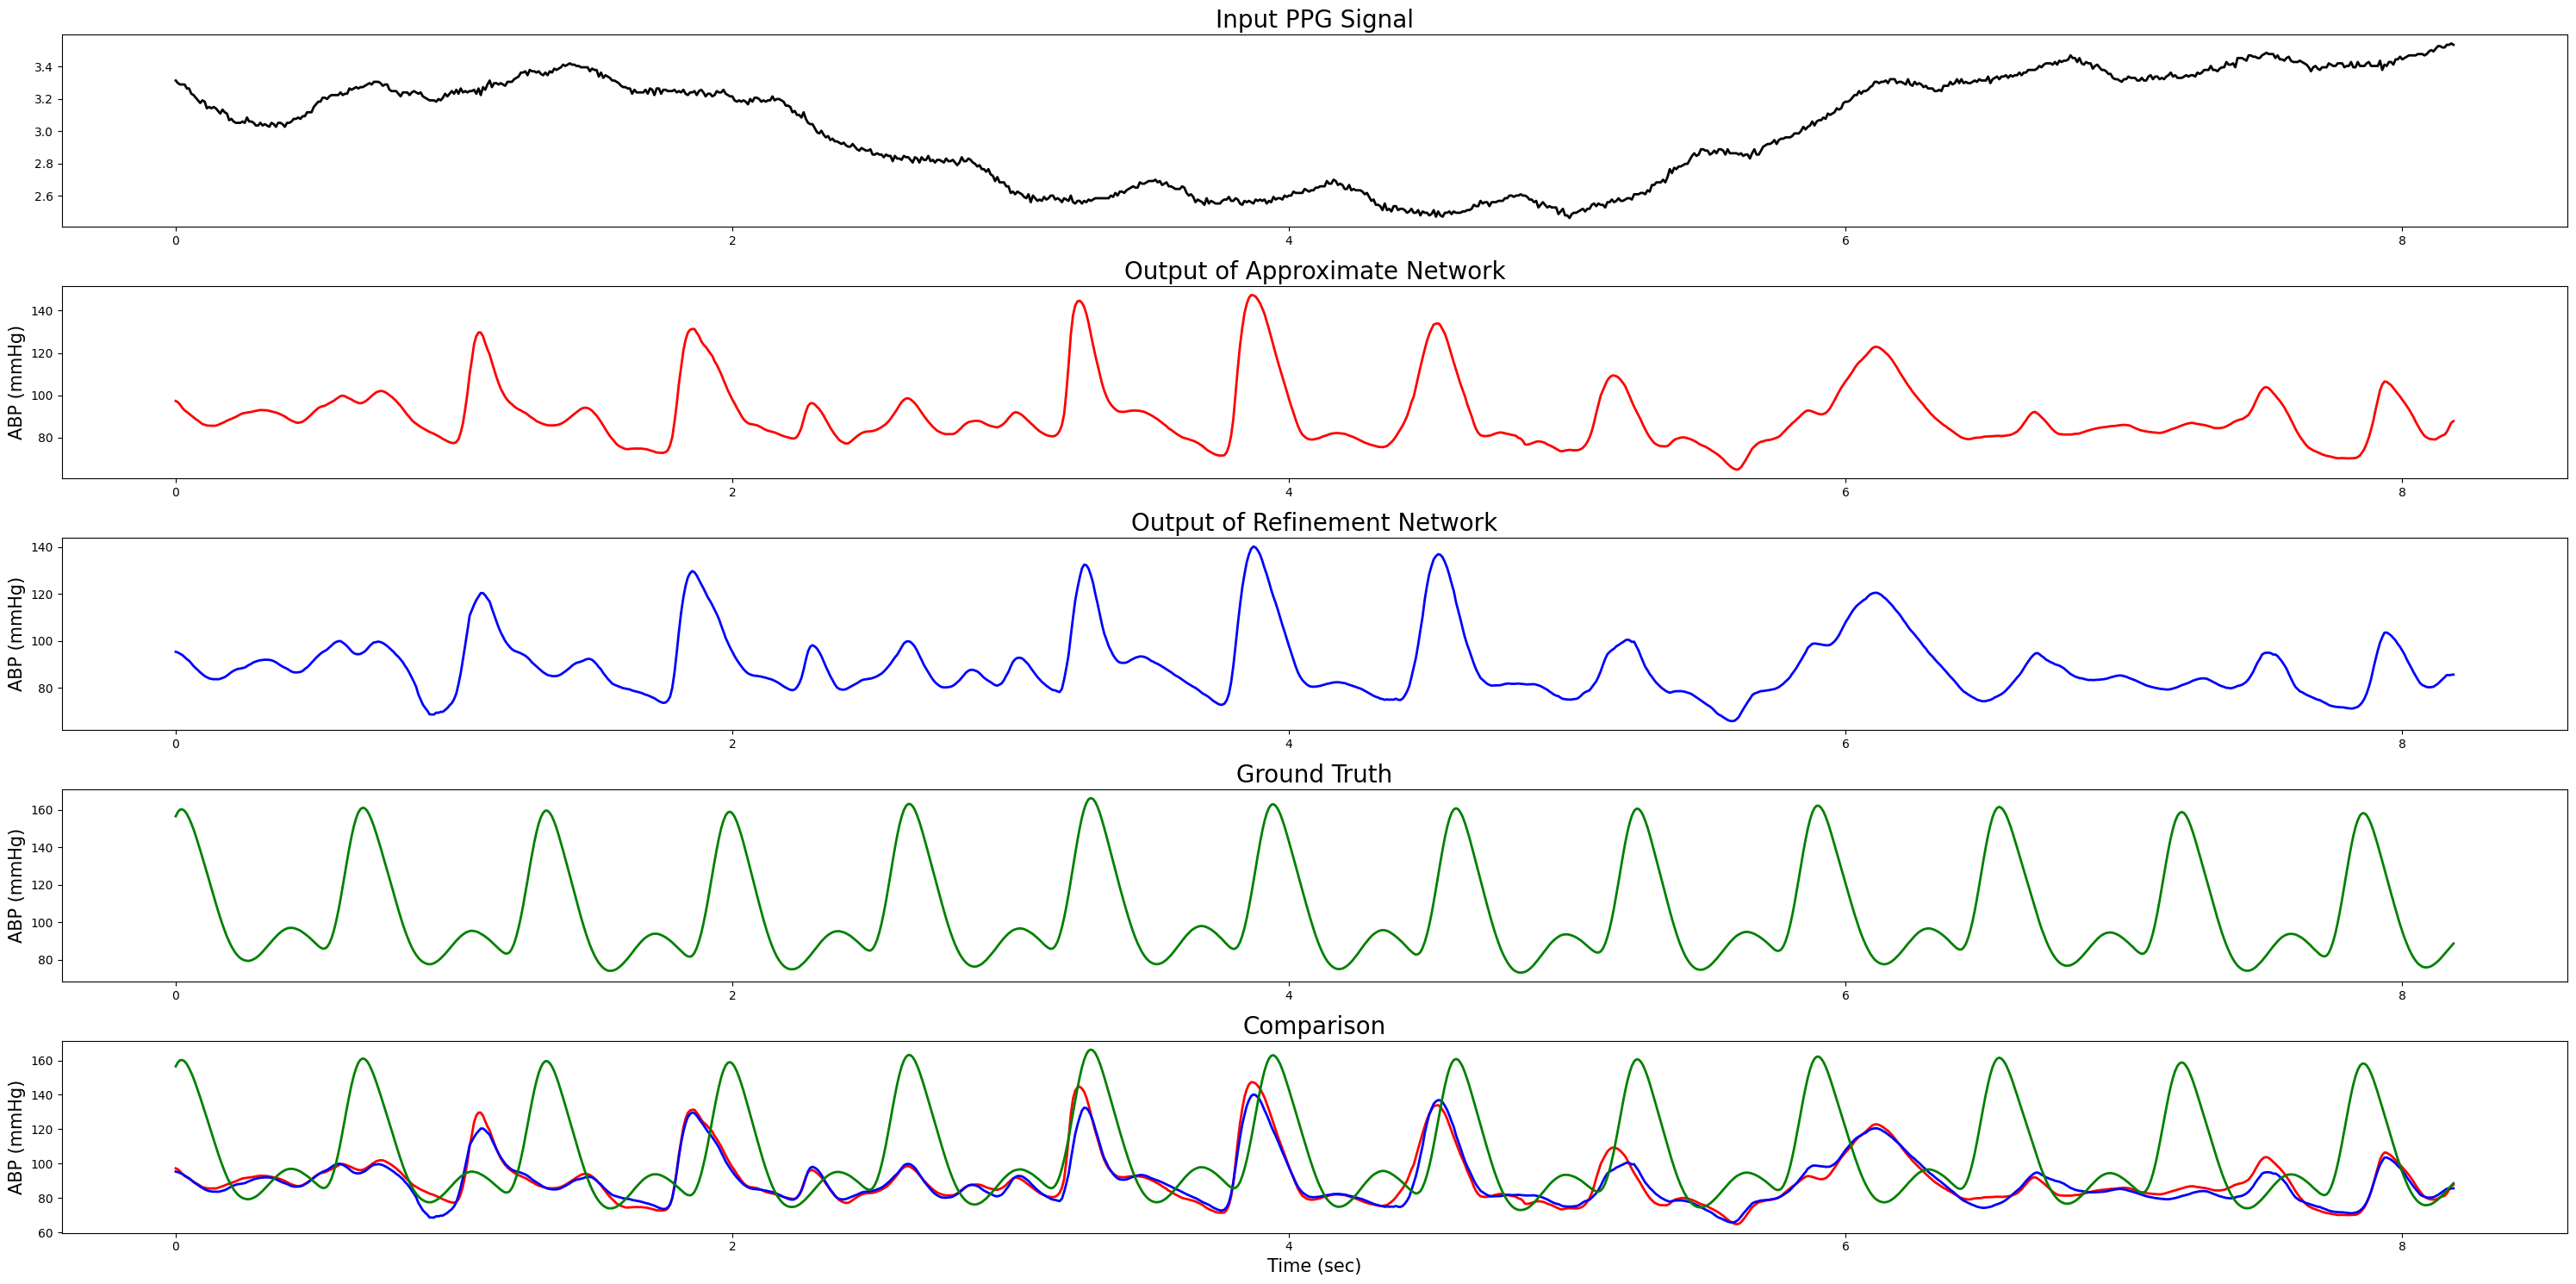

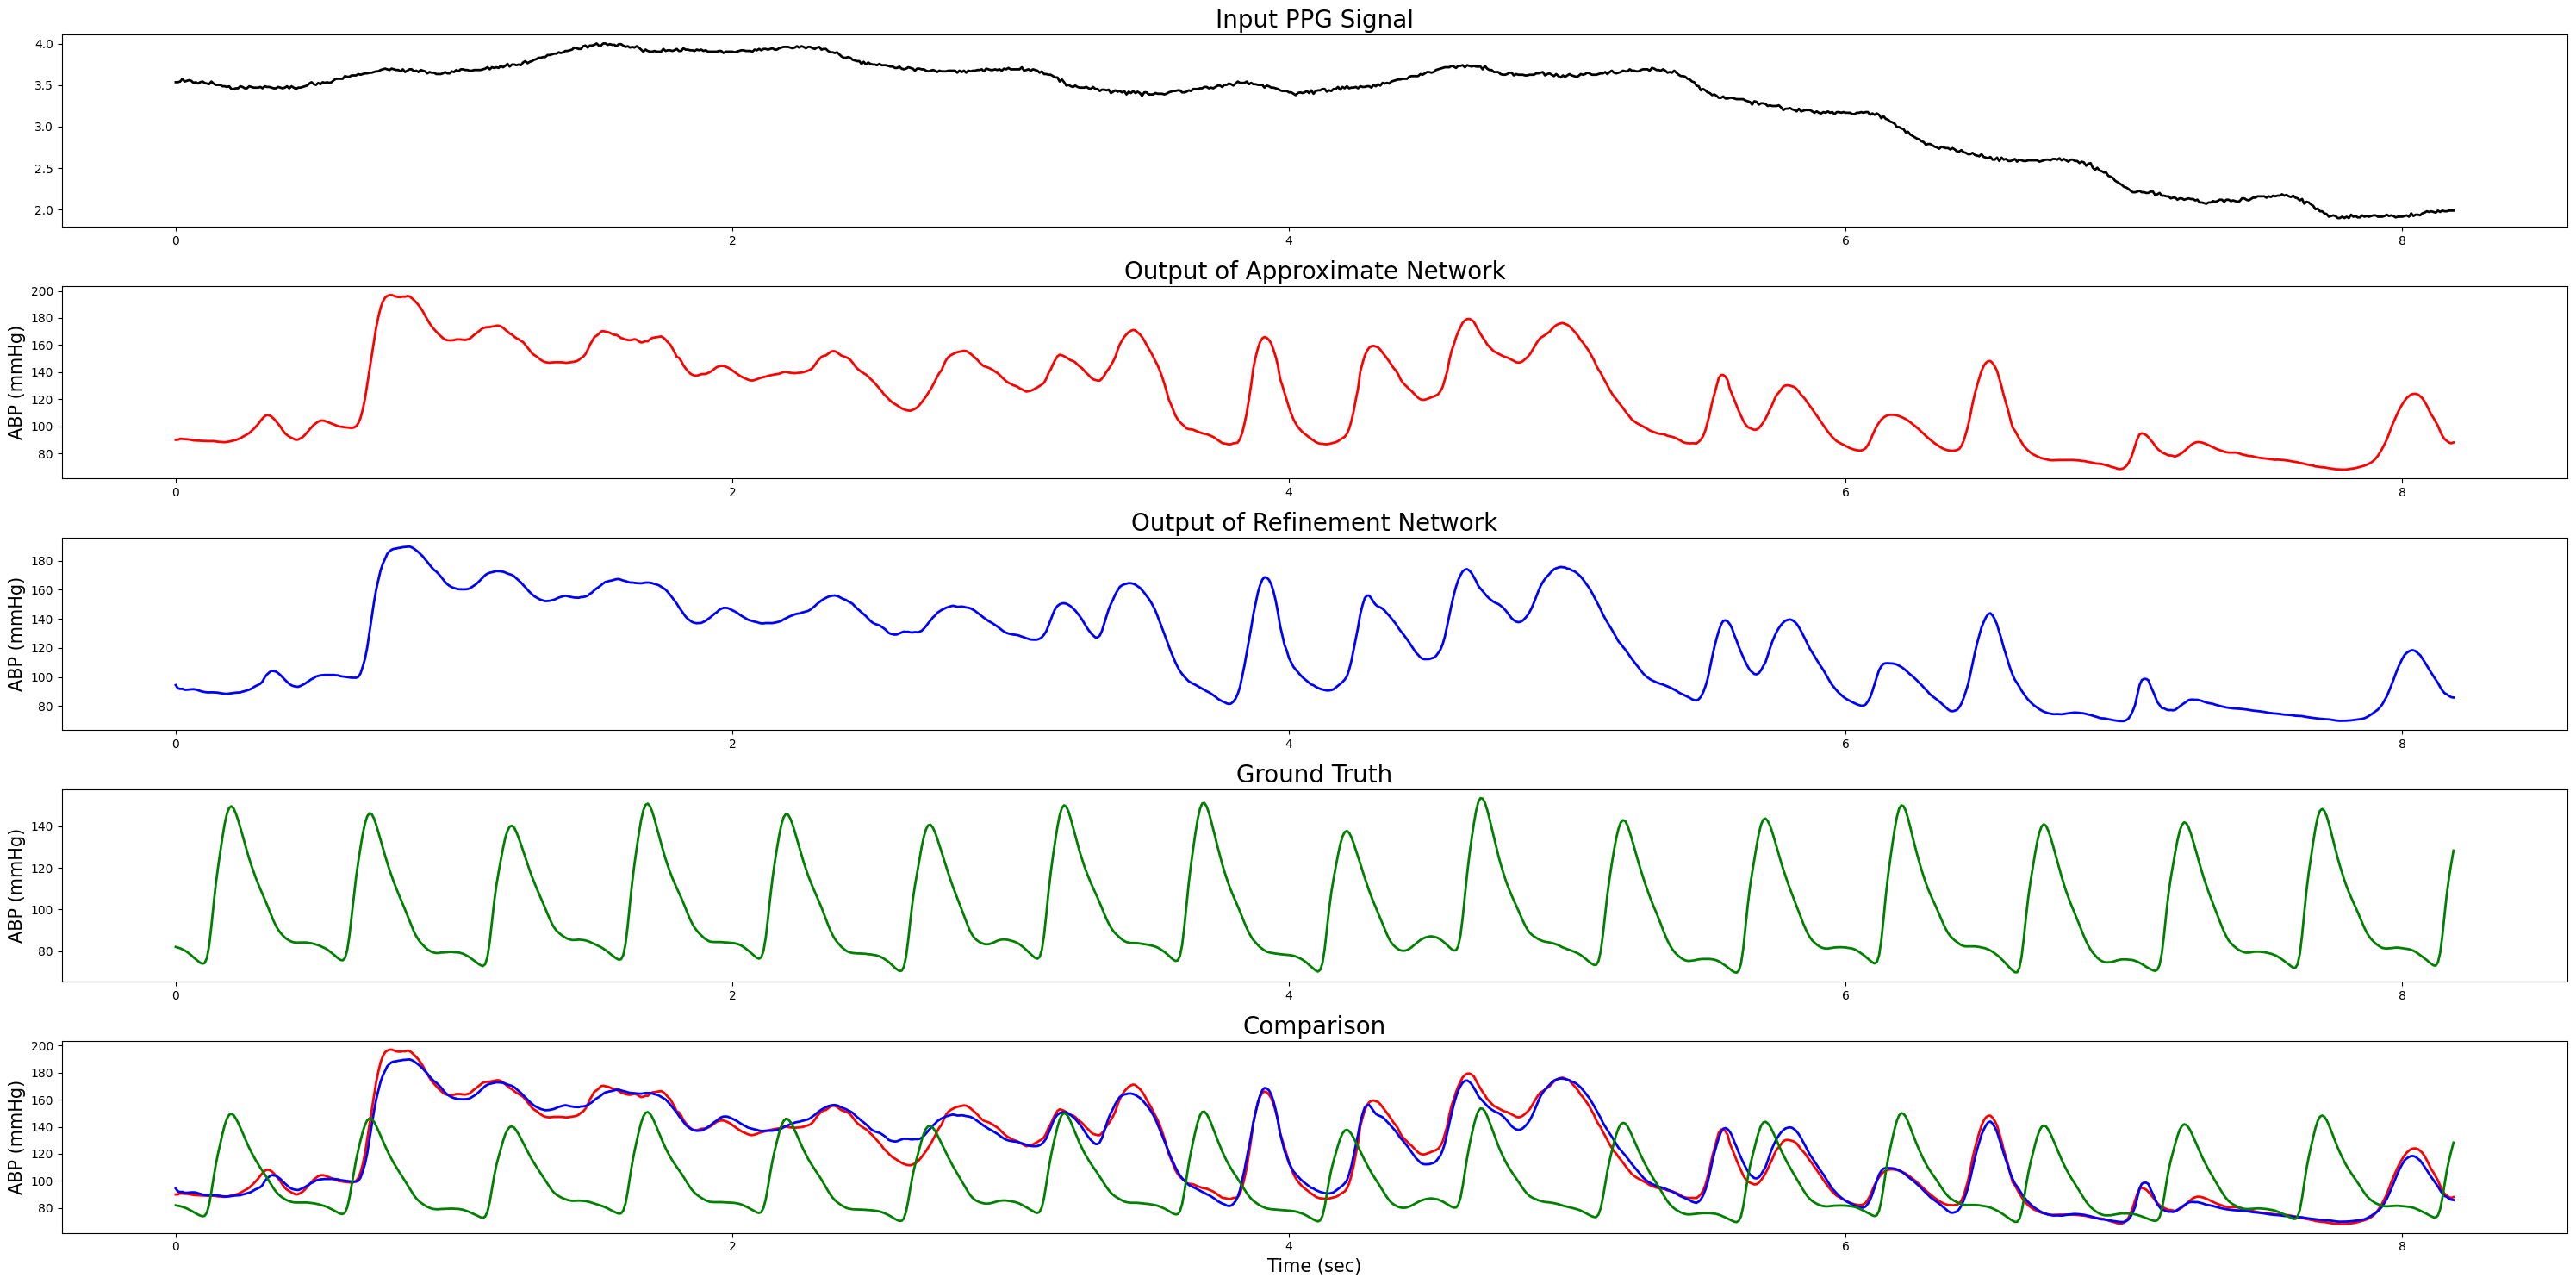

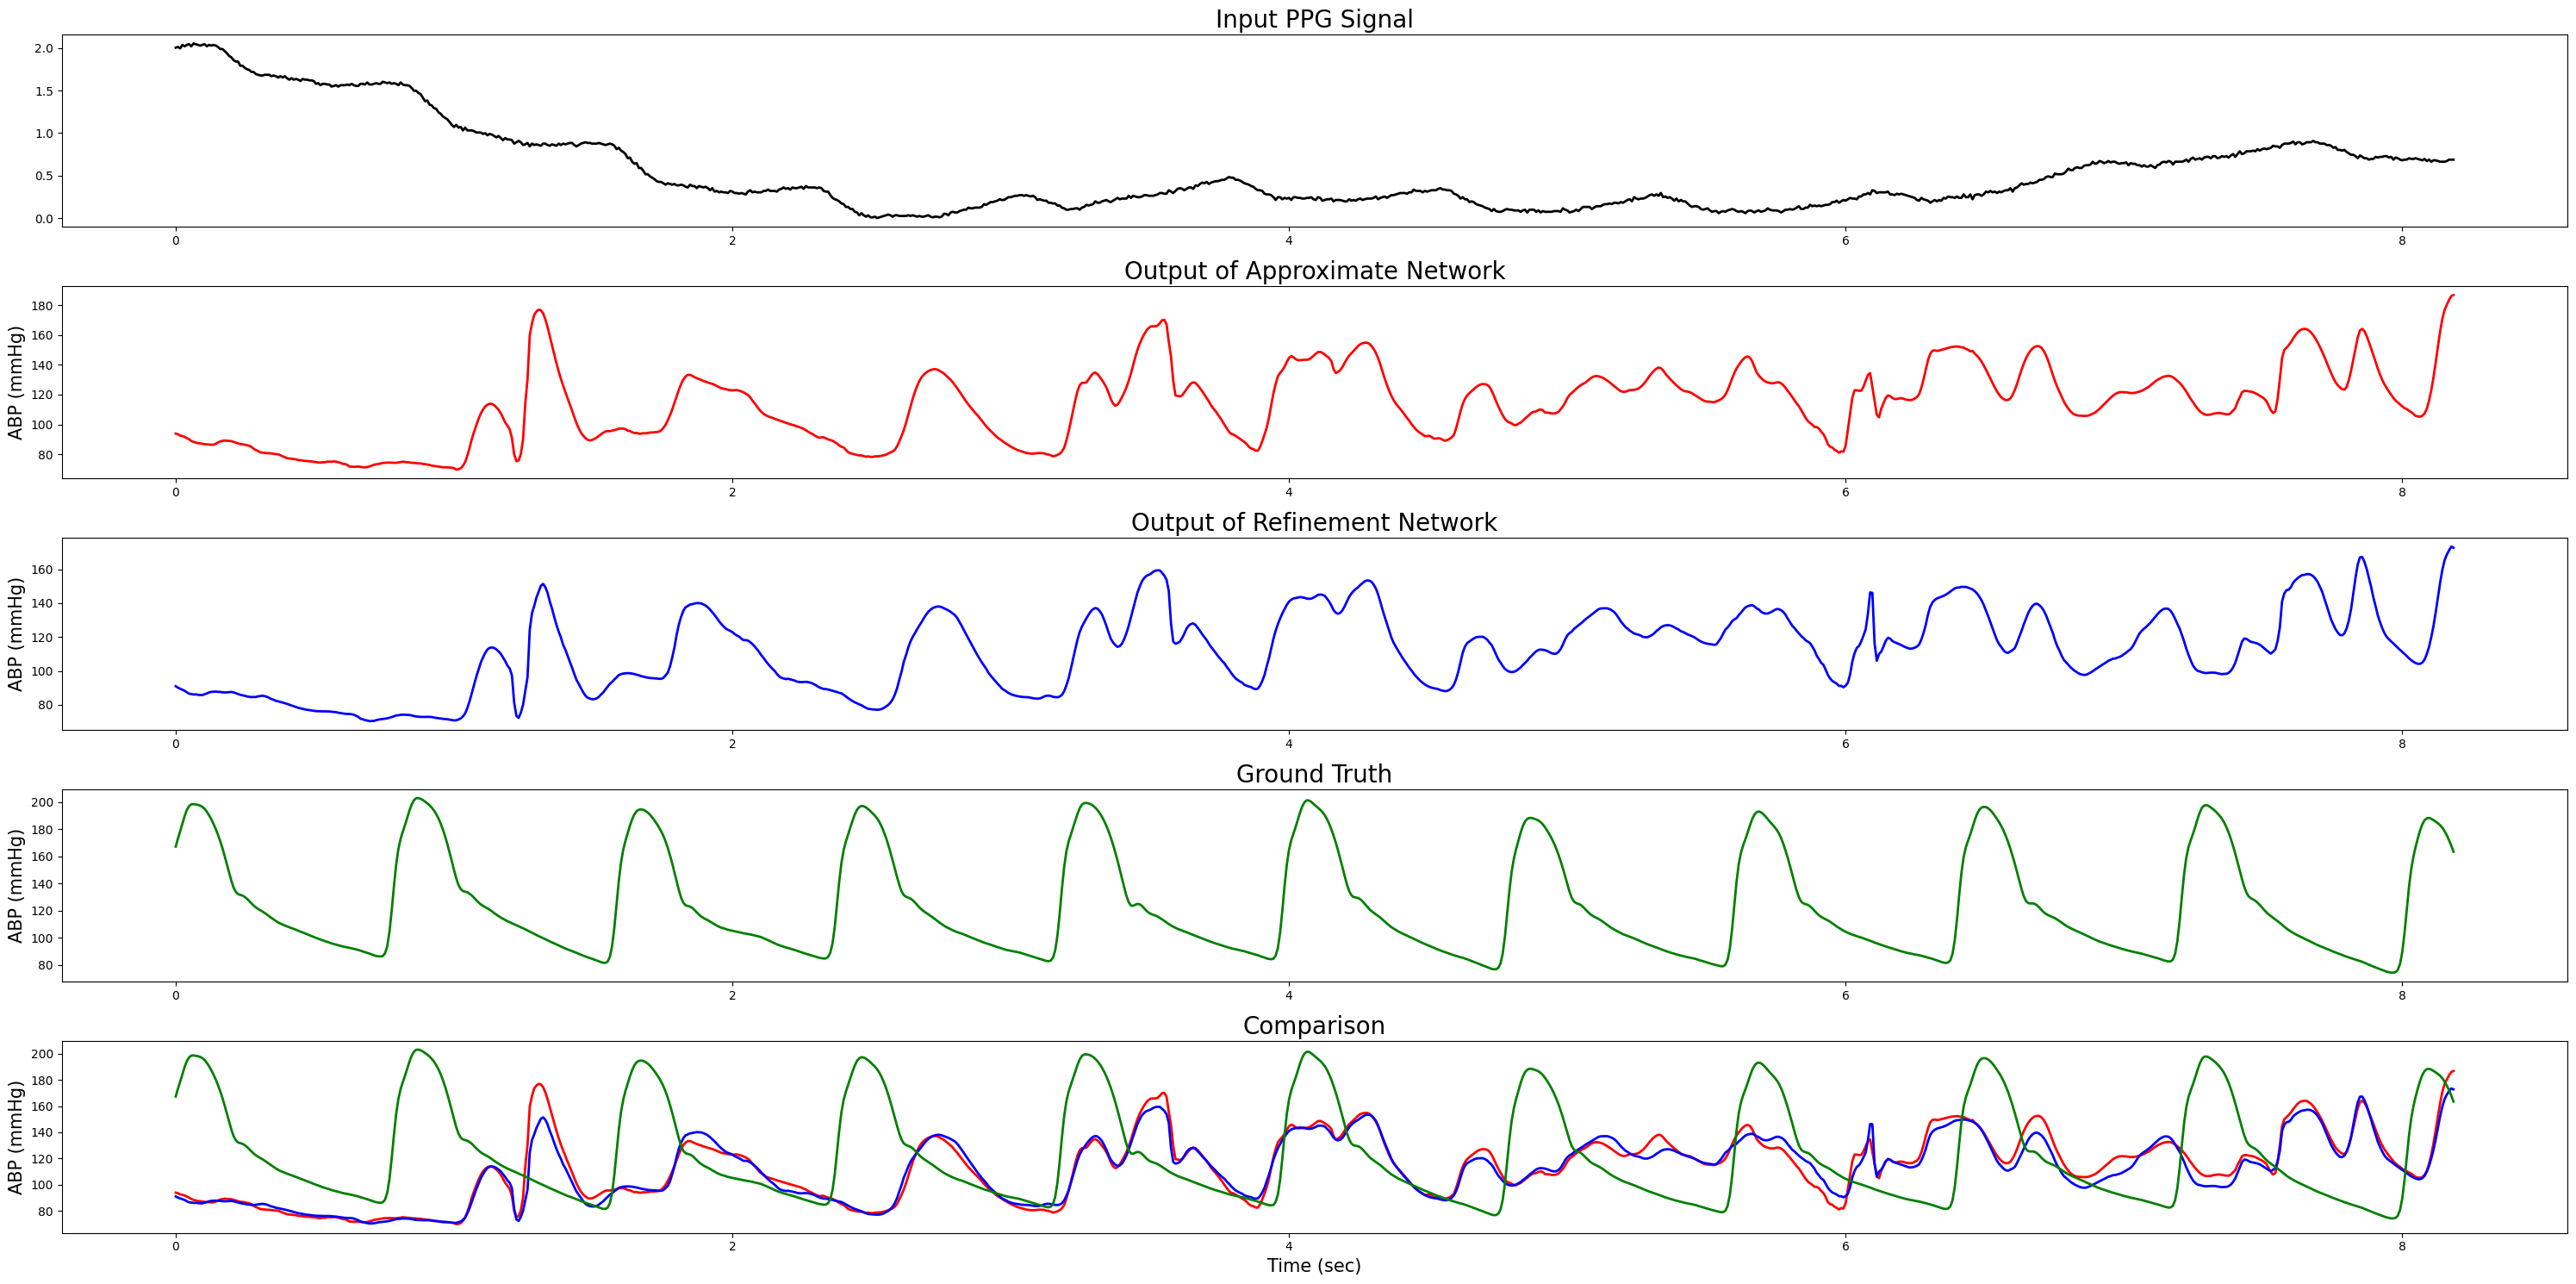

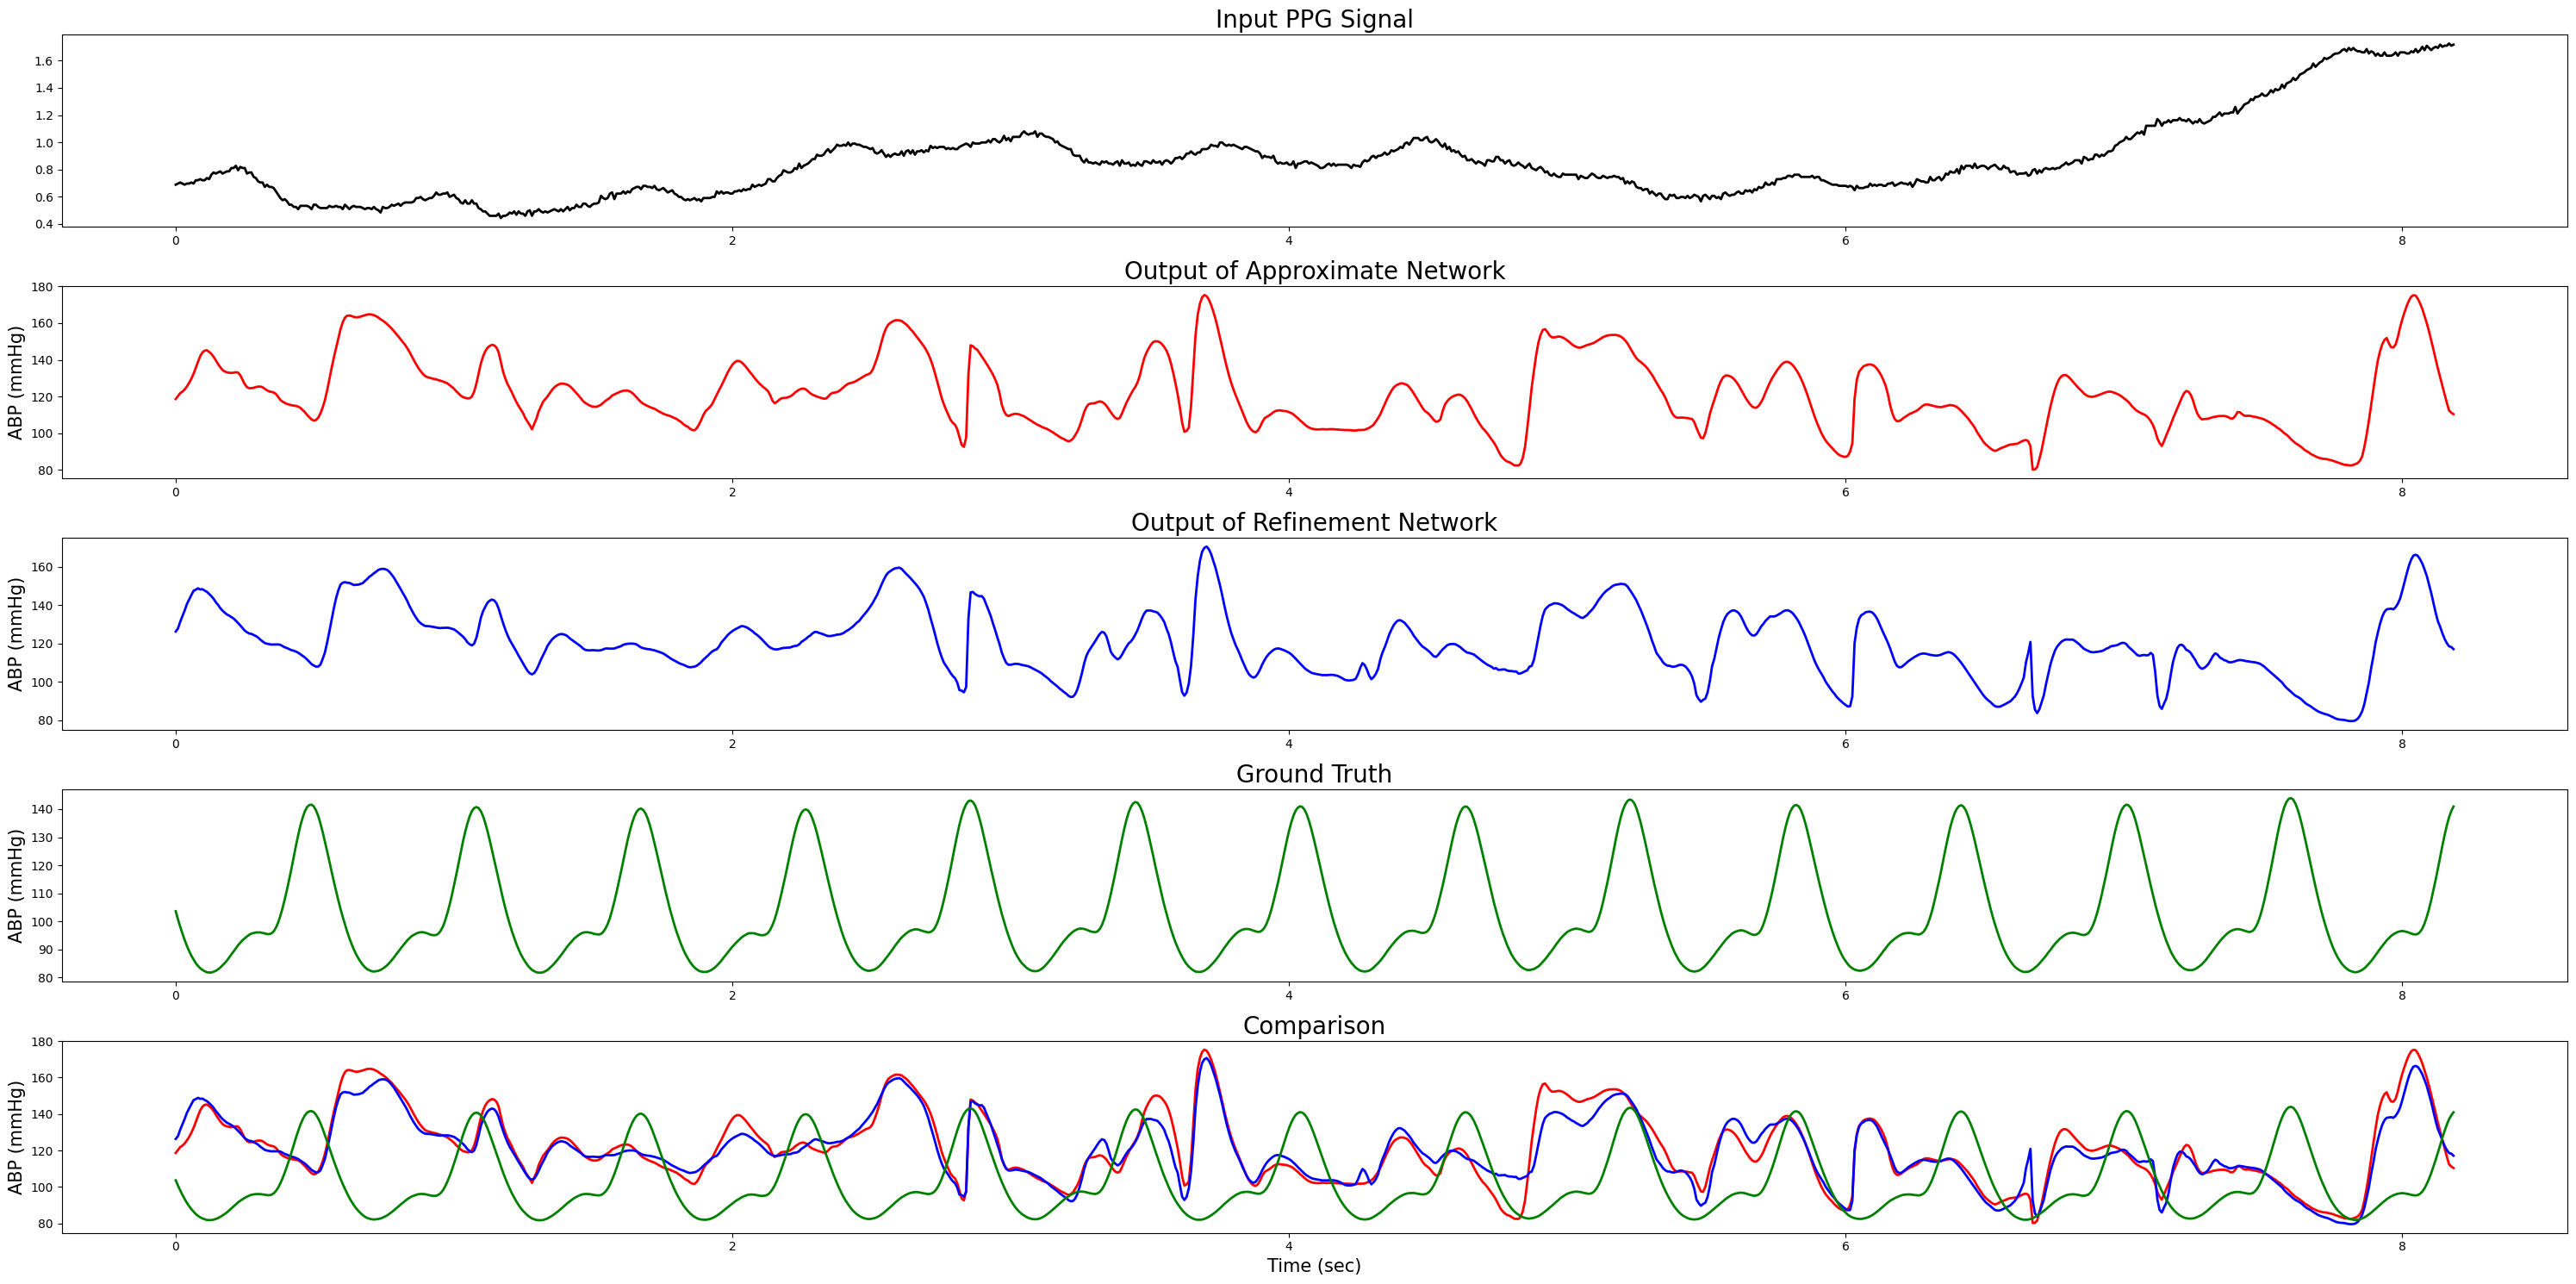

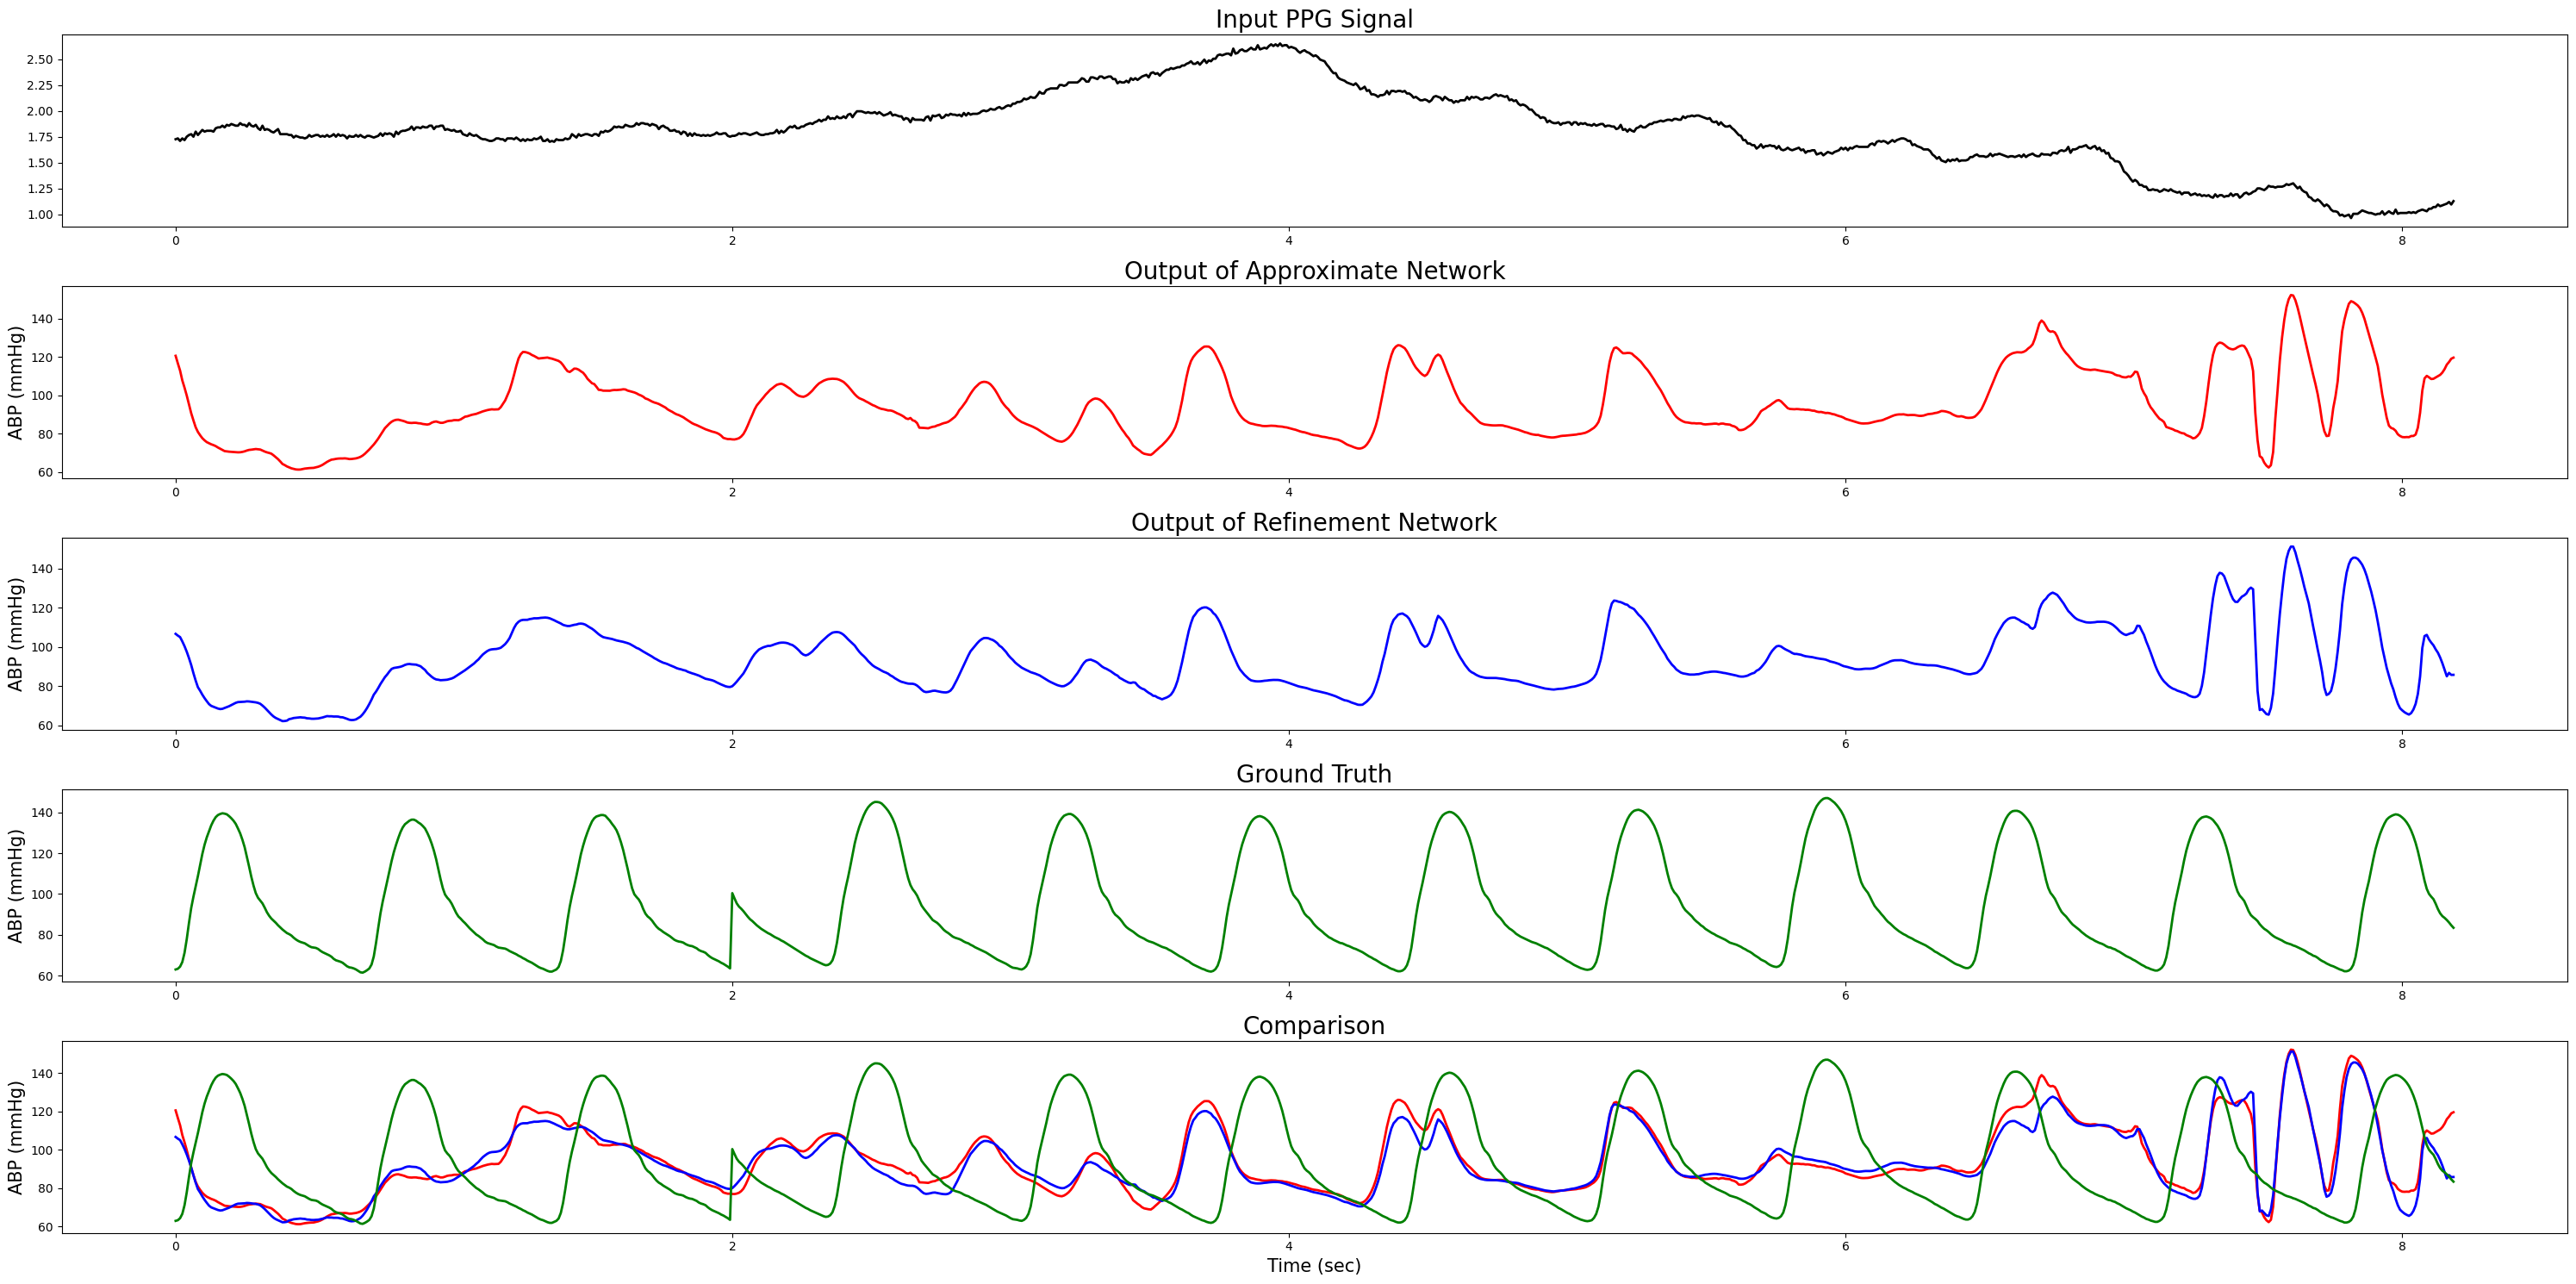

ValueError: invalid literal for int() with base 10: ''

In [22]:
meta = pickle.load(open(os.path.join('data', 'meta9.p'), 'rb'))			# loading metadata

max_ppg = meta['max_ppg']
min_ppg = meta['min_ppg']
max_abp = meta['max_abp']
min_abp = meta['min_abp']
Y_test_pred_approximate = Y_test_pred_approximate[0]
while(True):			# interactive cli

		indix = int(input(
			'Please input a record from 1 to 27260 to visualize.\nInput -1 to quit.\n> '))

		if(indix == -1):			# exit
			break

		if(indix < 1 or indix > 27260):			# wrong index
			continue

		indix -= 1

		ppg_signal = reshaped_array[indix] * max_ppg + min_ppg											# input ppg signal
		abp_signal_pred_approximate = Y_test_pred_approximate[indix] * max_abp + min_abp		# abp waveform approx.
		abp_signal_pred = Y_test_pred[indix] * max_abp + min_abp								# abp waveform predicted
		abp_signal_ground_truth = Y_test[indix] * max_abp + min_abp								# abp waveform ground truth

		time_scale = np.arange(0, 8.192, 8.192/len(ppg_signal))									# series for time axis

		plt.figure(figsize=(30, 15))


		plt.subplot(5, 1, 1)
		plt.plot(time_scale, ppg_signal, c='k', linewidth=2)
		plt.title('Input PPG Signal', fontsize=20)

		plt.subplot(5, 1, 2)
		plt.plot(time_scale, abp_signal_pred_approximate, c='r', linewidth=2)
		plt.ylabel('ABP (mmHg)', fontsize=15)
		plt.title('Output of Approximate Network', fontsize=20)

		plt.subplot(5, 1, 3)
		plt.plot(time_scale, abp_signal_pred, c='b', linewidth=2)
		plt.ylabel('ABP (mmHg)', fontsize=15)
		plt.title('Output of Refinement Network', fontsize=20)

		plt.subplot(5, 1, 4)
		plt.plot(time_scale, abp_signal_ground_truth, c='g', linewidth=2)
		plt.ylabel('ABP (mmHg)', fontsize=15)
		plt.title('Ground Truth', fontsize=20)

		plt.subplot(5, 1, 5)
		plt.plot(time_scale, abp_signal_pred_approximate, c='r', label='Output Level 1', linewidth=2)
		plt.plot(time_scale, abp_signal_pred, c='b', label='Output Level 2', linewidth=2)
		plt.plot(time_scale, abp_signal_ground_truth, c='g', label='Ground Truth', linewidth=2)
		plt.title('Comparison', fontsize=20)
		plt.xlabel('Time (sec)', fontsize=15)
		plt.ylabel('ABP (mmHg)', fontsize=15)

		plt.tight_layout()

		plt.show()



In [ ]:
meta = pickle.load(open(os.path.join('data', 'meta9.p'), 'rb'))			# loading metadata

max_ppg = meta['max_ppg']
min_ppg = meta['min_ppg']
max_abp = meta['max_abp']
min_abp = meta['min_abp']
Y_test_pred_approximate = Y_test_pred_approximate[0]
while(True):			# interactive cli

		indix = int(input(
			'Please input a record from 1 to 27260 to visualize.\nInput -1 to quit.\n> '))

		if(indix == -1):			# exit
			break

		if(indix < 1 or indix > 27260):			# wrong index
			continue

		indix -= 1

		ppg_signal = reshaped_array[indix] * max_ppg + min_ppg											# input ppg signal
		abp_signal_pred_approximate = Y_test_pred_approximate[indix] * max_abp + min_abp		# abp waveform approx.
		abp_signal_pred = Y_test_pred[indix] * max_abp + min_abp								# abp waveform predicted

		time_scale = np.arange(0, 8.192, 8.192/len(ppg_signal))									# series for time axis

		plt.figure(figsize=(30, 15))


		plt.subplot(5, 1, 1)
		plt.plot(time_scale, ppg_signal, c='k', linewidth=2)
		plt.title('Input PPG Signal', fontsize=20)

		plt.subplot(5, 1, 2)
		plt.plot(time_scale, abp_signal_pred_approximate, c='r', linewidth=2)
		plt.ylabel('ABP (mmHg)', fontsize=15)
		plt.title('Output of Approximate Network', fontsize=20)

		plt.subplot(5, 1, 3)
		plt.plot(time_scale, abp_signal_pred, c='b', linewidth=2)
		plt.ylabel('ABP (mmHg)', fontsize=15)
		plt.title('Output of Refinement Network', fontsize=20)

		plt.subplot(5, 1, 4)
		plt.plot(time_scale, abp_signal_ground_truth, c='g', linewidth=2)
		plt.ylabel('ABP (mmHg)', fontsize=15)
		plt.title('Ground Truth', fontsize=20)

		plt.subplot(5, 1, 5)
		plt.plot(time_scale, abp_signal_pred_approximate, c='r', label='Output Level 1', linewidth=2)
		plt.plot(time_scale, abp_signal_pred, c='b', label='Output Level 2', linewidth=2)
		plt.plot(time_scale, abp_signal_ground_truth, c='g', label='Ground Truth', linewidth=2)
		plt.title('Comparison', fontsize=20)
		plt.xlabel('Time (sec)', fontsize=15)
		plt.ylabel('ABP (mmHg)', fontsize=15)

		plt.tight_layout()

		plt.show()
